# Quantum Circuit Partitioning Analysis

This notebook analyzes quantum circuit partitioning strategies with different noise levels and communication primitives.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create plots directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [2]:
# Load the data
df = pd.read_csv('results.csv')

# Display first few rows
print("Data shape:", df.shape)
print("\nFirst few rows:")
df.head()

Data shape: (2657, 19)

First few rows:


origin strategy  communication_noise_multiplier  local_noise  \
0  dj_indep_10q    local                             1.0        0.001   
1  dj_indep_10q    local                             1.0        0.001   
2  dj_indep_10q    local                             1.0        0.001   
3  dj_indep_10q    local                             1.0        0.001   
4  dj_indep_10q    local                             1.0        0.001   

  communication_primitive  num_qubits  circuit_depth  partitioned_depth  \
0                      tp          10             11                 84   
1                      tp          10             11                 49   
2                      tp          10             11                 39   
3                      tp          10             11                 37   
4                      tp          10             11                 37   

   num_partitions_requested  num_partitions_tested  noise_free_expectation  \
0                         1                      1                   -0.03   
1                         2                      2                   -0.08   
2                         3                      3                   -0.14   
3                         4                      4                    0.00   
4                         5                      5                   -0.01   

   noisy_expectation  zne_expectation  noisy_error  zne_error  \
0               0.04            0.102         0.07      0.132   
1              -0.02           -0.068         0.06      0.012   
2              -0.04            0.128         0.10      0.268   
3              -0.03            0.138         0.03      0.138   
4              -0.04           -0.136         0.03      0.126   

   error_reduction  partition_time  shots  seed  
0        -0.885714        0.001902    200   NaN  
1         0.800000        0.002403    200   NaN  
2        -1.680000        0.002181    200   NaN  
3        -3.600000        0.002082    200   NaN  
4        -3.200000        0.002121    200   NaN

In [3]:
# Check unique values for key columns
print("Strategies:", df['strategy'].unique())
print("Local noise levels:", sorted(df['local_noise'].unique()))
print("Communication noise multipliers:", sorted(df['communication_noise_multiplier'].unique()))
print("Communication primitives:", df['communication_primitive'].unique())
print("Origins (algorithms):", df['origin'].unique())

Strategies: ['local' 'global']
Local noise levels: [0.001, 0.005, 0.01, 0.015, 0.02]
Communication noise multipliers: [1.0, 1.1, 1.2]
Communication primitives: ['tp' 'cat']
Origins (algorithms): ['dj_indep_10q' 'dj_indep_3q' 'dj_indep_2q' 'dj_indep_5q' 'dj_indep_9q'
 'dj_indep_8q' 'dj_indep_4q' 'dj_indep_7q' 'dj_indep_6q' 'ghz_indep_9q'
 'ghz_indep_5q' 'ghz_indep_4q' 'ghz_indep_8q' 'ghz_indep_3q'
 'ghz_indep_2q' 'ghz_indep_10q' 'ghz_indep_7q' 'ghz_indep_6q'
 'wstate_indep_7q' 'wstate_indep_10q' 'wstate_indep_6q' 'wstate_indep_3q'
 'wstate_indep_2q' 'wstate_indep_9q' 'wstate_indep_5q' 'wstate_indep_4q'
 'wstate_indep_8q']


## Graph 1: Error Rate vs Partitions by Strategy (one graph per local_noise level)

Filtering for communication_noise_multiplier = 1.0

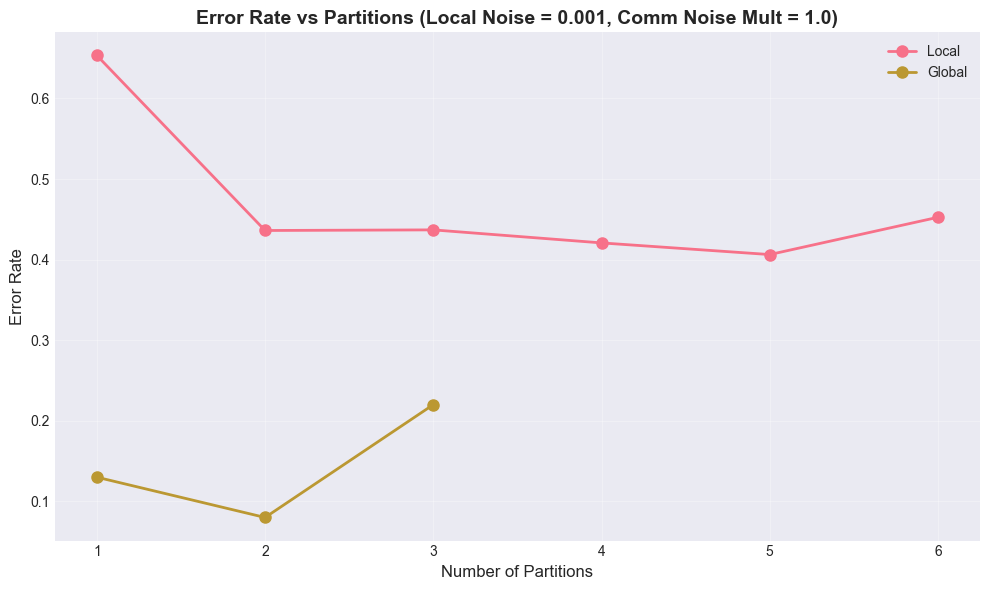

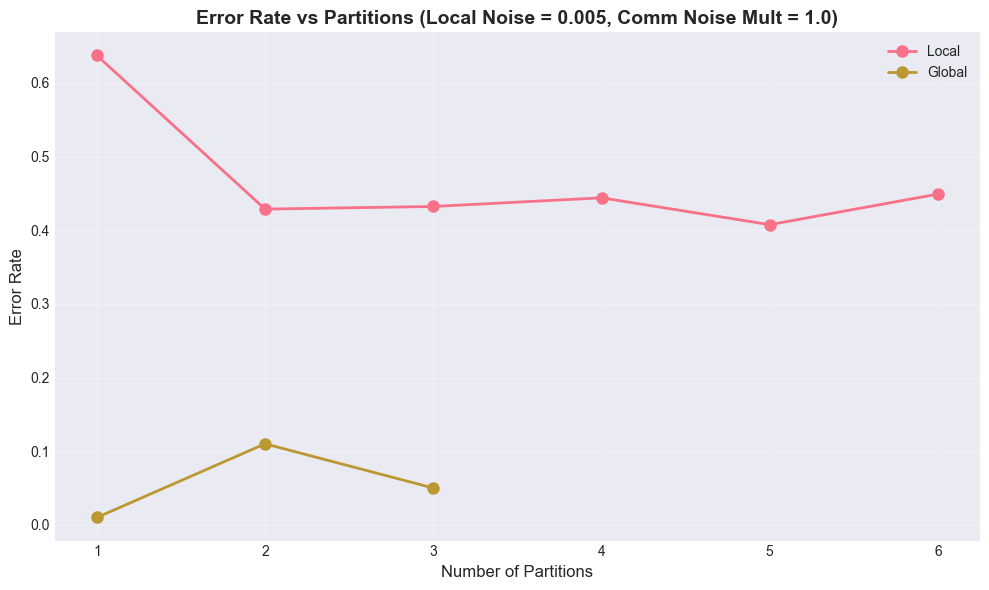

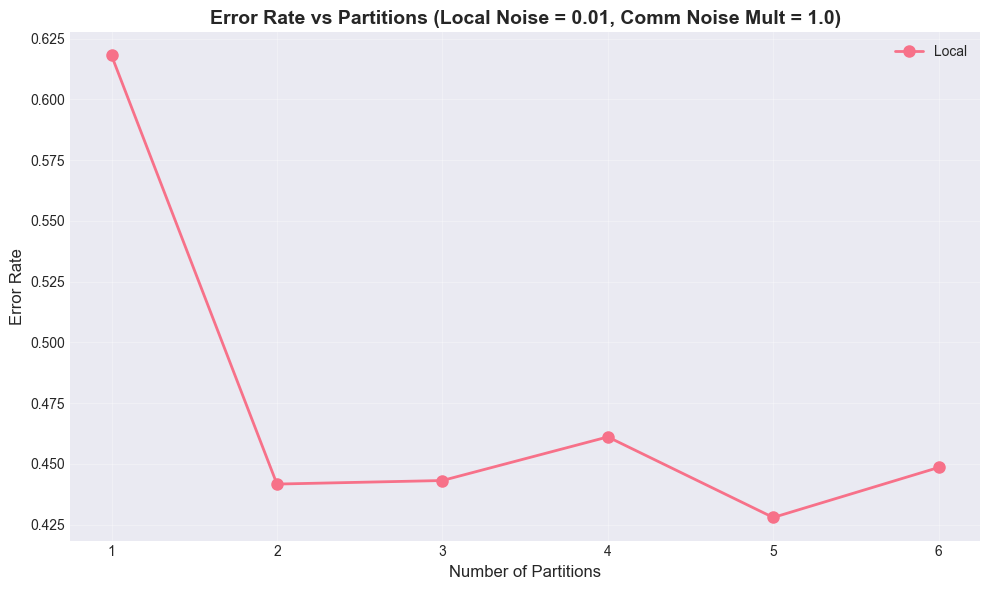

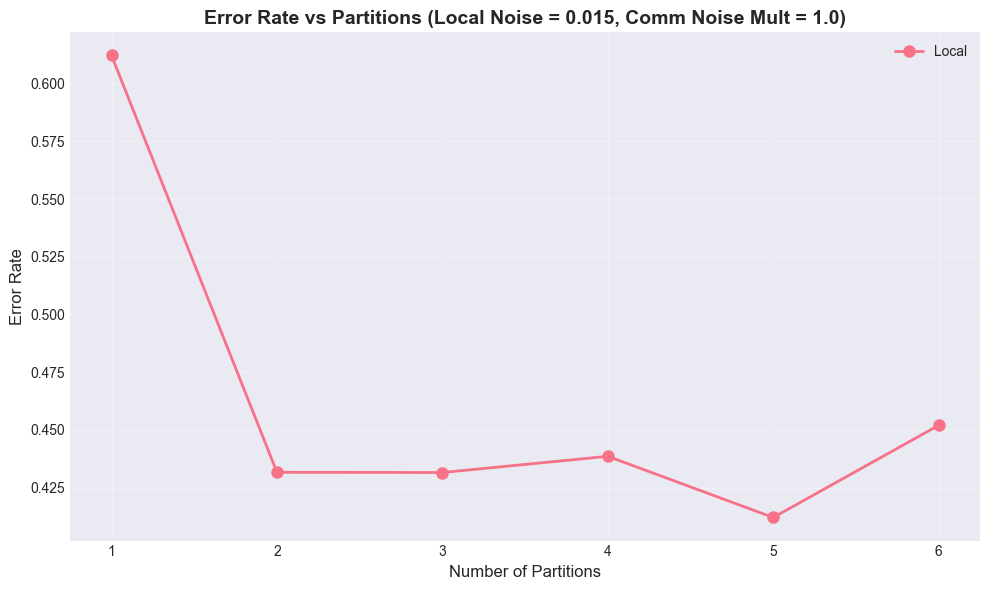

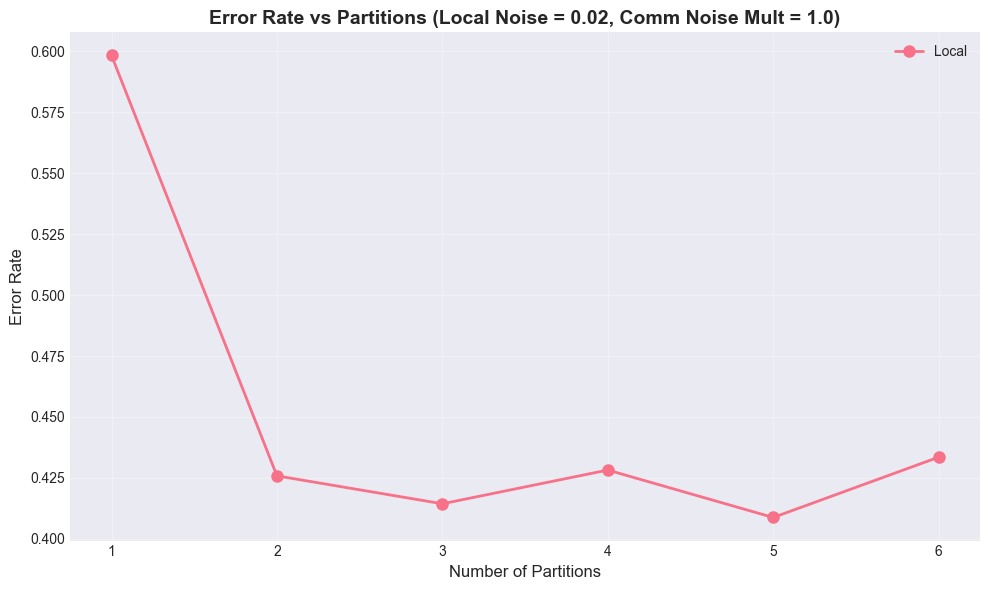

Generated 5 plots for different noise levels.


In [4]:
# Filter for communication_noise_multiplier = 1.0
df_filtered = df[df['communication_noise_multiplier'] == 1.0].copy()

# Get unique noise levels
noise_levels = sorted(df_filtered['local_noise'].unique())

# Map strategy names for better labels
strategy_map = {
    'local': 'Local',
    'global': 'Global',
    'none': 'No Partitioning'
}

# Create a plot for each noise level
for noise in noise_levels:
    df_noise = df_filtered[df_filtered['local_noise'] == noise]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each strategy
    for strategy in df_noise['strategy'].unique():
        df_strat = df_noise[df_noise['strategy'] == strategy]
        
        # Group by num_partitions_tested and calculate mean error
        grouped = df_strat.groupby('num_partitions_tested')['noisy_error'].mean().reset_index()
        
        label = strategy_map.get(strategy, strategy)
        ax.plot(grouped['num_partitions_tested'], grouped['noisy_error'], 
                marker='o', label=label, linewidth=2, markersize=8)
    
    ax.set_xlabel('Number of Partitions', fontsize=12)
    ax.set_ylabel('Error Rate', fontsize=12)
    ax.set_title(f'Error Rate vs Partitions (Local Noise = {noise}, Comm Noise Mult = 1.0)', 
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'plots/error_vs_partitions_noise_{noise}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
print(f"Generated {len(noise_levels)} plots for different noise levels.")

## Graph 2: Error Rate vs Partitions (one graph per communication_noise_multiplier)

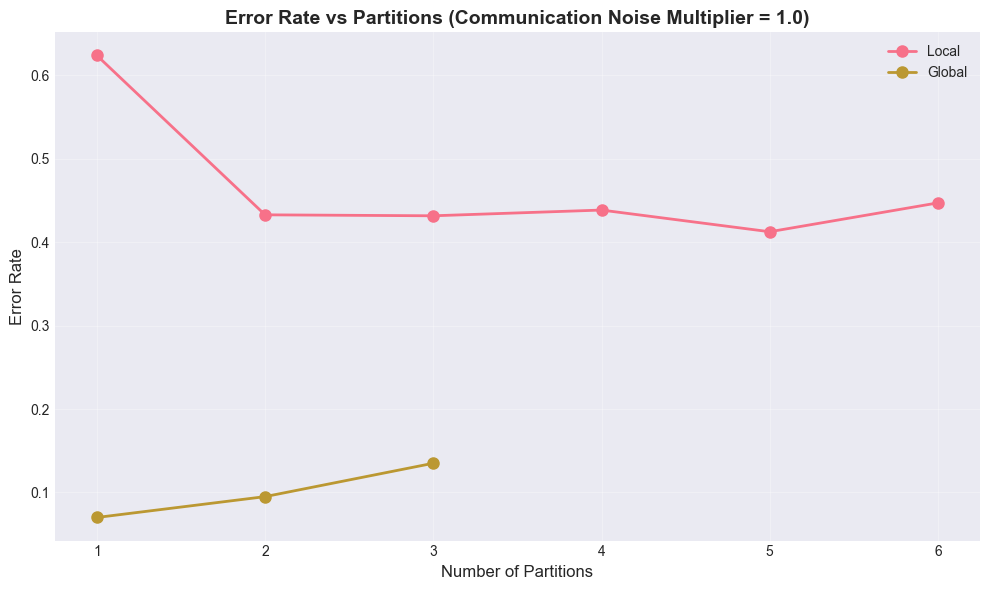

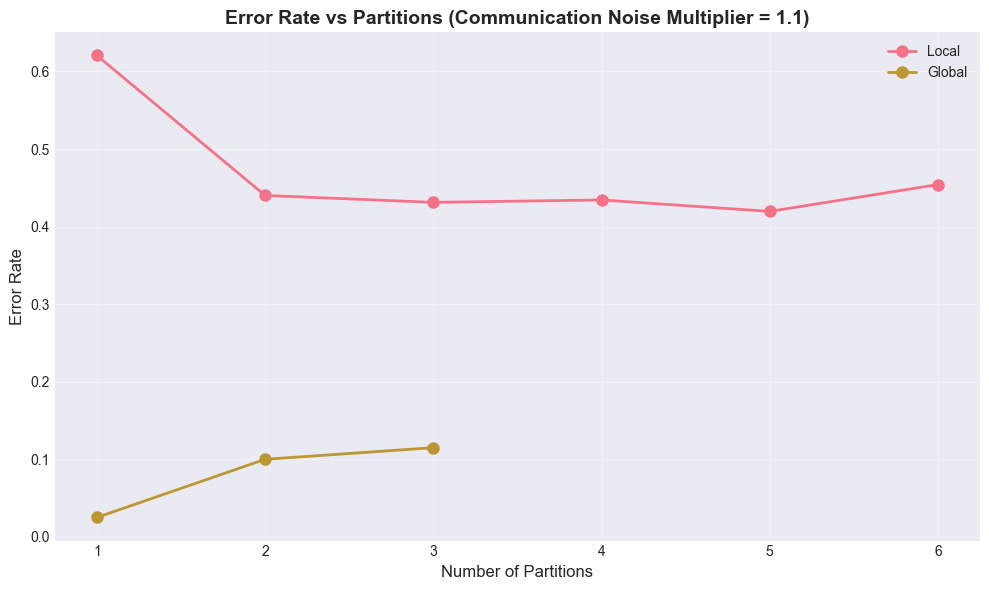

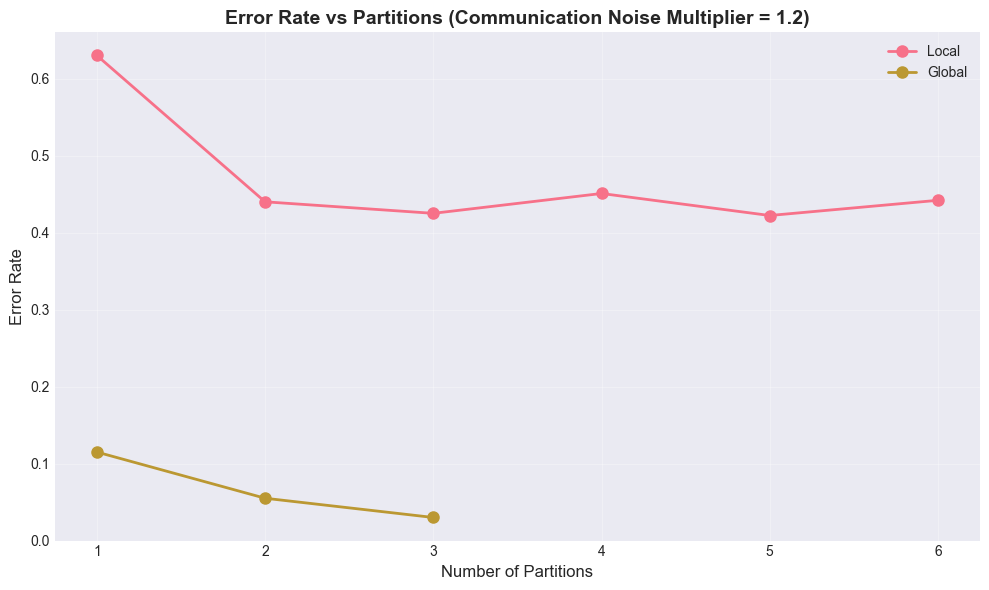

Generated 3 plots for different communication noise multipliers.


In [5]:
# Get unique communication noise multipliers
comm_noise_mults = sorted(df['communication_noise_multiplier'].unique())

# Create a plot for each communication noise multiplier
for comm_mult in comm_noise_mults:
    df_comm = df[df['communication_noise_multiplier'] == comm_mult]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each strategy
    for strategy in df_comm['strategy'].unique():
        df_strat = df_comm[df_comm['strategy'] == strategy]
        
        # Group by num_partitions_tested and calculate mean error
        grouped = df_strat.groupby('num_partitions_tested')['noisy_error'].mean().reset_index()
        
        label = strategy_map.get(strategy, strategy)
        ax.plot(grouped['num_partitions_tested'], grouped['noisy_error'], 
                marker='o', label=label, linewidth=2, markersize=8)
    
    ax.set_xlabel('Number of Partitions', fontsize=12)
    ax.set_ylabel('Error Rate', fontsize=12)
    ax.set_title(f'Error Rate vs Partitions (Communication Noise Multiplier = {comm_mult})', 
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'plots/error_vs_partitions_comm_mult_{comm_mult}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
print(f"Generated {len(comm_noise_mults)} plots for different communication noise multipliers.")

## Graph 3: Summary Table - Algorithm vs Noise Parameters and Error Rates

Showing error rates for different communication primitives (TG/CAT/None)

In [6]:
# Create summary table
# Group by algorithm, noise parameters, and communication primitive
summary = df.groupby(['origin', 'local_noise', 'communication_noise_multiplier', 
                      'communication_primitive', 'strategy'])['noisy_error'].mean().reset_index()

# Pivot to create columns for different communication primitives
table = summary.pivot_table(
    index=['origin', 'local_noise', 'communication_noise_multiplier', 'strategy'],
    columns='communication_primitive',
    values='noisy_error',
    aggfunc='mean'
).reset_index()

# Rename columns for clarity
table.columns.name = None
column_rename = {
    'origin': 'Algorithm',
    'local_noise': 'Local Noise',
    'communication_noise_multiplier': 'Comm Noise Mult',
    'strategy': 'Strategy'
}

# Check which communication primitives exist and rename appropriately
comm_prims = [col for col in table.columns if col not in column_rename.keys()]
for prim in comm_prims:
    if prim.lower() in ['tg', 'teleportation']:
        column_rename[prim] = 'TG Error'
    elif prim.lower() in ['cat', 'cat_state']:
        column_rename[prim] = 'CAT Error'
    elif prim.lower() in ['none', 'no_comm']:
        column_rename[prim] = 'No Comm Error'
    else:
        column_rename[prim] = f'{prim} Error'

table = table.rename(columns=column_rename)

# Sort by algorithm and noise parameters
table = table.sort_values(['Algorithm', 'Local Noise', 'Comm Noise Mult', 'Strategy'])

# Display the table
print("\nSummary Table: Algorithm Performance by Noise and Communication Primitive")
print("="*100)
display(table)

# Save to CSV
table.to_csv('plots/summary_table.csv', index=False)
print("\nTable saved to plots/summary_table.csv")


Summary Table: Algorithm Performance by Noise and Communication Primitive


Algorithm  Local Noise  Comm Noise Mult Strategy  CAT Error  \
0       dj_indep_10q        0.001              1.0   global        NaN   
1       dj_indep_10q        0.001              1.0    local   0.053333   
2       dj_indep_10q        0.001              1.1   global        NaN   
3       dj_indep_10q        0.001              1.1    local   0.100000   
4       dj_indep_10q        0.001              1.2   global        NaN   
..               ...          ...              ...      ...        ...   
406  wstate_indep_9q        0.015              1.1    local        NaN   
407  wstate_indep_9q        0.015              1.2    local        NaN   
408  wstate_indep_9q        0.020              1.0    local        NaN   
409  wstate_indep_9q        0.020              1.1    local        NaN   
410  wstate_indep_9q        0.020              1.2    local        NaN   

     tp Error  
0    0.143333  
1    0.060000  
2    0.056667  
3    0.040000  
4    0.093333  
..        ...  
406  0.981667  
407  1.031667  
408  0.925000  
409  0.973333  
410  0.971667  

[411 rows x 6 columns]


Table saved to plots/summary_table.csv


In [7]:
# Create a more readable formatted version
styled_table = table.style.format({
    col: '{:.4f}' for col in table.columns if 'Error' in col
}).set_caption('Algorithm Performance Summary').set_properties(**{
    'text-align': 'center'
})

# Save as HTML for better viewing
styled_table.to_html('plots/summary_table.html')
print("Formatted table saved to plots/summary_table.html")

Formatted table saved to plots/summary_table.html


## Additional Analysis: Error Reduction Comparison

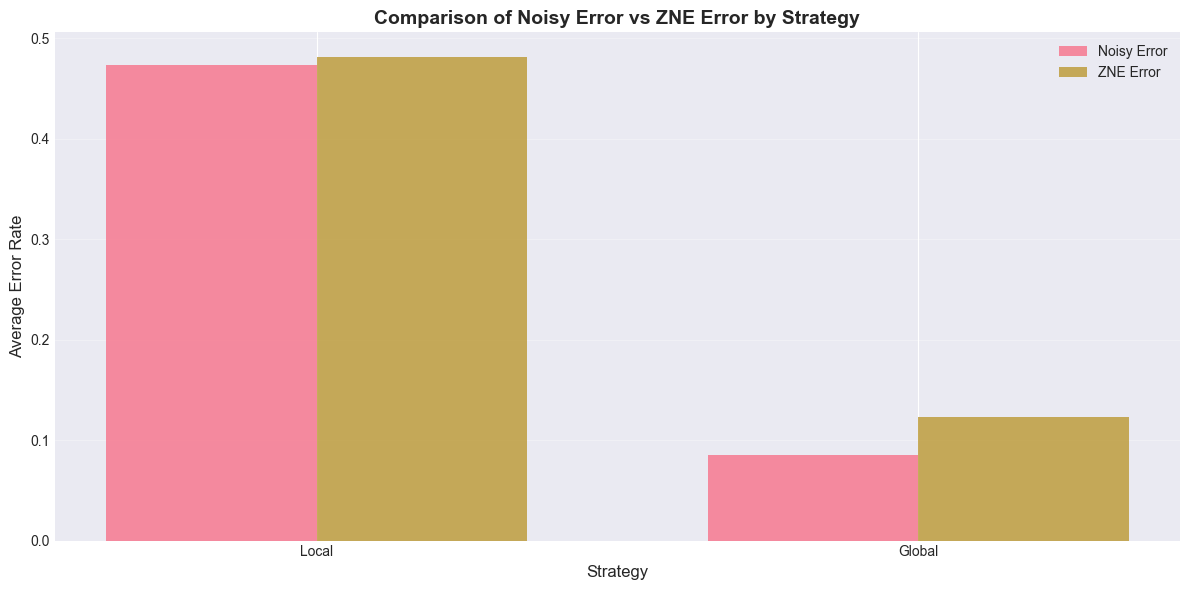

In [8]:
# Visualize ZNE error reduction
fig, ax = plt.subplots(figsize=(12, 6))

df_with_zne = df[df['zne_error'].notna()].copy()

strategies = df_with_zne['strategy'].unique()
x = np.arange(len(strategies))
width = 0.35

noisy_errors = [df_with_zne[df_with_zne['strategy'] == s]['noisy_error'].mean() for s in strategies]
zne_errors = [df_with_zne[df_with_zne['strategy'] == s]['zne_error'].mean() for s in strategies]

bars1 = ax.bar(x - width/2, noisy_errors, width, label='Noisy Error', alpha=0.8)
bars2 = ax.bar(x + width/2, zne_errors, width, label='ZNE Error', alpha=0.8)

ax.set_xlabel('Strategy', fontsize=12)
ax.set_ylabel('Average Error Rate', fontsize=12)
ax.set_title('Comparison of Noisy Error vs ZNE Error by Strategy', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([strategy_map.get(s, s) for s in strategies])
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('plots/zne_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
print("\nAll plots have been saved to the 'plots/' directory!")
print("\nGenerated files:")
print("  - Error vs partitions plots (by noise level)")
print("  - Error vs partitions plots (by communication noise multiplier)")
print("  - Summary table (CSV and HTML)")
print("  - ZNE comparison plot")


All plots have been saved to the 'plots/' directory!

Generated files:
  - Error vs partitions plots (by noise level)
  - Error vs partitions plots (by communication noise multiplier)
  - Summary table (CSV and HTML)
  - ZNE comparison plot


## Analysis Function: Impact of Parameters on Error Reduction

In [10]:
def analyze_error_reduction_factors(df, algorithm=None):
    """
    Analyzes how local noise level, noise multiplier, and communication strategy
    affect error reduction for different numbers of partitions.
    
    Parameters:
    -----------
    df : DataFrame
        The main dataframe with all experimental data
    algorithm : str or None
        Specific algorithm to analyze. If None, analyzes all combined.
    
    Returns:
    --------
    dict : Analysis results with insights
    """
    
    # Filter data
    if algorithm:
        df_filtered = df[df['origin'] == algorithm].copy()
        analysis_name = f"Algorithm: {algorithm}"
    else:
        df_filtered = df.copy()
        analysis_name = "All Algorithms Combined"
    
    # Filter for cat and tp communication primitives only
    df_filtered = df_filtered[df_filtered['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    
    # Standardize communication primitive names
    df_filtered['comm_type'] = df_filtered['communication_primitive'].replace({
        'tp': 'teleportation',
        'tg': 'teleportation'
    })
    
    results = {
        'analysis_name': analysis_name,
        'total_experiments': len(df_filtered),
        'findings': []
    }
    
    print(f"\n{'='*80}")
    print(f"ANALYSIS: {analysis_name}")
    print(f"{'='*80}\n")
    print(f"Total experiments analyzed: {len(df_filtered)}\n")
    
    # 1. Analyze by local noise level
    print("\n" + "="*80)
    print("1. IMPACT OF LOCAL NOISE LEVEL")
    print("="*80)
    
    for noise_mult in sorted(df_filtered['communication_noise_multiplier'].unique()):
        print(f"\n  Communication Noise Multiplier: {noise_mult}")
        print(f"  {'-'*76}")
        
        df_mult = df_filtered[df_filtered['communication_noise_multiplier'] == noise_mult]
        
        for comm in sorted(df_mult['comm_type'].unique()):
            print(f"\n    Communication Strategy: {comm.upper()}")
            
            df_comm = df_mult[df_mult['comm_type'] == comm]
            
            # Group by noise level and partitions
            summary = df_comm.groupby(['local_noise', 'num_partitions_tested']).agg({
                'error_reduction': 'mean',
                'noisy_error': 'mean',
                'zne_error': 'mean'
            }).reset_index()
            
            # For each noise level, show trends
            for noise in sorted(summary['local_noise'].unique()):
                noise_data = summary[summary['local_noise'] == noise].sort_values('num_partitions_tested')
                
                if len(noise_data) > 0:
                    avg_error_reduction = noise_data['error_reduction'].mean()
                    avg_noisy_error = noise_data['noisy_error'].mean()
                    
                    # Check if error reduction improves with more partitions
                    if len(noise_data) > 1:
                        partition_correlation = np.corrcoef(
                            noise_data['num_partitions_tested'], 
                            noise_data['error_reduction']
                        )[0,1]
                        trend = "increases" if partition_correlation > 0.1 else "decreases" if partition_correlation < -0.1 else "remains stable"
                    else:
                        trend = "N/A (single partition)"
                    
                    print(f"\n      Local Noise = {noise}:")
                    print(f"        • Avg Error Reduction: {avg_error_reduction:.4f} ({avg_error_reduction*100:.2f}%)")
                    print(f"        • Avg Noisy Error: {avg_noisy_error:.4f}")
                    print(f"        • Partitions tested: {noise_data['num_partitions_tested'].min()}-{noise_data['num_partitions_tested'].max()}")
                    print(f"        • Error reduction trend with more partitions: {trend}")
                    
                    results['findings'].append({
                        'noise_multiplier': noise_mult,
                        'communication': comm,
                        'local_noise': noise,
                        'avg_error_reduction': avg_error_reduction,
                        'avg_noisy_error': avg_noisy_error,
                        'partition_trend': trend
                    })
    
    # 2. Compare communication strategies
    print("\n\n" + "="*80)
    print("2. COMPARISON: CAT vs TELEPORTATION")
    print("="*80)
    
    for noise_mult in sorted(df_filtered['communication_noise_multiplier'].unique()):
        print(f"\n  Communication Noise Multiplier: {noise_mult}")
        print(f"  {'-'*76}")
        
        df_mult = df_filtered[df_filtered['communication_noise_multiplier'] == noise_mult]
        
        for noise in sorted(df_mult['local_noise'].unique()):
            print(f"\n    Local Noise = {noise}:")
            
            df_noise = df_mult[df_mult['local_noise'] == noise]
            
            cat_data = df_noise[df_noise['comm_type'] == 'cat']
            tp_data = df_noise[df_noise['comm_type'] == 'teleportation']
            
            if len(cat_data) > 0 and len(tp_data) > 0:
                cat_err_red = cat_data['error_reduction'].mean()
                tp_err_red = tp_data['error_reduction'].mean()
                
                cat_noisy = cat_data['noisy_error'].mean()
                tp_noisy = tp_data['noisy_error'].mean()
                
                better = "CAT" if cat_err_red > tp_err_red else "Teleportation"
                diff = abs(cat_err_red - tp_err_red)
                
                print(f"      • CAT Error Reduction: {cat_err_red:.4f} ({cat_err_red*100:.2f}%)")
                print(f"      • CAT Noisy Error: {cat_noisy:.4f}")
                print(f"      • Teleportation Error Reduction: {tp_err_red:.4f} ({tp_err_red*100:.2f}%)")
                print(f"      • Teleportation Noisy Error: {tp_noisy:.4f}")
                print(f"      • Winner: {better} (by {diff:.4f} or {diff*100:.2f}% points)")
            elif len(cat_data) > 0:
                print(f"      • Only CAT data available: {cat_data['error_reduction'].mean():.4f}")
            elif len(tp_data) > 0:
                print(f"      • Only Teleportation data available: {tp_data['error_reduction'].mean():.4f}")
    
    # 3. Overall insights
    print("\n\n" + "="*80)
    print("3. KEY INSIGHTS")
    print("="*80)
    
    # Best configuration
    best_config = df_filtered.loc[df_filtered['error_reduction'].idxmax()]
    worst_config = df_filtered.loc[df_filtered['error_reduction'].idxmin()]
    
    print(f"\n  Best Configuration:")
    print(f"    • Communication: {best_config['comm_type']}")
    print(f"    • Local Noise: {best_config['local_noise']}")
    print(f"    • Noise Multiplier: {best_config['communication_noise_multiplier']}")
    print(f"    • Partitions: {best_config['num_partitions_tested']}")
    print(f"    • Error Reduction: {best_config['error_reduction']:.4f} ({best_config['error_reduction']*100:.2f}%)")
    
    print(f"\n  Worst Configuration:")
    print(f"    • Communication: {worst_config['comm_type']}")
    print(f"    • Local Noise: {worst_config['local_noise']}")
    print(f"    • Noise Multiplier: {worst_config['communication_noise_multiplier']}")
    print(f"    • Partitions: {worst_config['num_partitions_tested']}")
    print(f"    • Error Reduction: {worst_config['error_reduction']:.4f} ({worst_config['error_reduction']*100:.2f}%)")
    
    # Overall statistics
    print(f"\n  Overall Statistics:")
    print(f"    • Mean Error Reduction: {df_filtered['error_reduction'].mean():.4f}")
    print(f"    • Median Error Reduction: {df_filtered['error_reduction'].median():.4f}")
    print(f"    • Std Dev: {df_filtered['error_reduction'].std():.4f}")
    
    # Correlation analysis
    print(f"\n  Correlation Analysis:")
    corr_noise = df_filtered[['local_noise', 'error_reduction']].corr().iloc[0,1]
    corr_mult = df_filtered[['communication_noise_multiplier', 'error_reduction']].corr().iloc[0,1]
    corr_part = df_filtered[['num_partitions_tested', 'error_reduction']].corr().iloc[0,1]
    
    print(f"    • Local Noise ↔ Error Reduction: {corr_noise:.4f}")
    print(f"    • Noise Multiplier ↔ Error Reduction: {corr_mult:.4f}")
    print(f"    • Num Partitions ↔ Error Reduction: {corr_part:.4f}")
    
    print(f"\n{'='*80}\n")
    
    return results

## Run Analysis for Each Algorithm

In [11]:
# Analyze each algorithm individually
all_results = {}

algorithms = df['origin'].unique()

for algo in algorithms:
    results = analyze_error_reduction_factors(df, algorithm=algo)
    all_results[algo] = results


ANALYSIS: Algorithm: dj_indep_10q

Total experiments analyzed: 197


1. IMPACT OF LOCAL NOISE LEVEL

  Communication Noise Multiplier: 1.0
  ----------------------------------------------------------------------------

    Communication Strategy: CAT

      Local Noise = 0.001:
        • Avg Error Reduction: -2.6961 (-269.61%)
        • Avg Noisy Error: 0.0533
        • Partitions tested: 1-6
        • Error reduction trend with more partitions: decreases

      Local Noise = 0.005:
        • Avg Error Reduction: -0.1278 (-12.78%)
        • Avg Noisy Error: 0.0717
        • Partitions tested: 1-6
        • Error reduction trend with more partitions: decreases

      Local Noise = 0.01:
        • Avg Error Reduction: -0.5449 (-54.49%)
        • Avg Noisy Error: 0.1117
        • Partitions tested: 1-6
        • Error reduction trend with more partitions: increases

      Local Noise = 0.015:
        • Avg Error Reduction: -1.1357 (-113.57%)
        • Avg Noisy Error: 0.0617
        • Pa

## Run Combined Analysis (All Algorithms)

In [12]:
# Analyze all algorithms combined
combined_results = analyze_error_reduction_factors(df, algorithm=None)
all_results['combined'] = combined_results


ANALYSIS: All Algorithms Combined

Total experiments analyzed: 2657


1. IMPACT OF LOCAL NOISE LEVEL

  Communication Noise Multiplier: 1.0
  ----------------------------------------------------------------------------

    Communication Strategy: CAT

      Local Noise = 0.001:
        • Avg Error Reduction: -54710395473242.8750 (-5471039547324288.00%)
        • Avg Noisy Error: 0.1276
        • Partitions tested: 1-6
        • Error reduction trend with more partitions: increases

      Local Noise = 0.005:
        • Avg Error Reduction: -1.1881 (-118.81%)
        • Avg Noisy Error: 0.1420
        • Partitions tested: 1-6
        • Error reduction trend with more partitions: increases

      Local Noise = 0.01:
        • Avg Error Reduction: -76060793706702.1406 (-7606079370670214.00%)
        • Avg Noisy Error: 0.1612
        • Partitions tested: 1-6
        • Error reduction trend with more partitions: increases

      Local Noise = 0.015:
        • Avg Error Reduction: -200159983

## Save Analysis Results

In [13]:
# Save detailed findings to CSV
import json

# Compile all findings into a dataframe
all_findings = []
for algo_name, result in all_results.items():
    for finding in result['findings']:
        finding['algorithm'] = algo_name
        all_findings.append(finding)

findings_df = pd.DataFrame(all_findings)
findings_df.to_csv('plots/error_reduction_analysis.csv', index=False)
print("Analysis results saved to plots/error_reduction_analysis.csv")

# Also save as JSON for complete results
with open('plots/error_reduction_analysis.json', 'w') as f:
    # Convert numpy types to native Python types for JSON serialization
    def convert_types(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return obj
    
    json_safe_results = json.loads(json.dumps(all_results, default=convert_types))
    json.dump(json_safe_results, f, indent=2)

print("Complete analysis saved to plots/error_reduction_analysis.json")

Analysis results saved to plots/error_reduction_analysis.csv
Complete analysis saved to plots/error_reduction_analysis.json


## Visual Analysis: Understanding Parameter Effects

Multiple visualization approaches to understand how parameters affect results

### 1. Heatmaps: Error Reduction Landscape

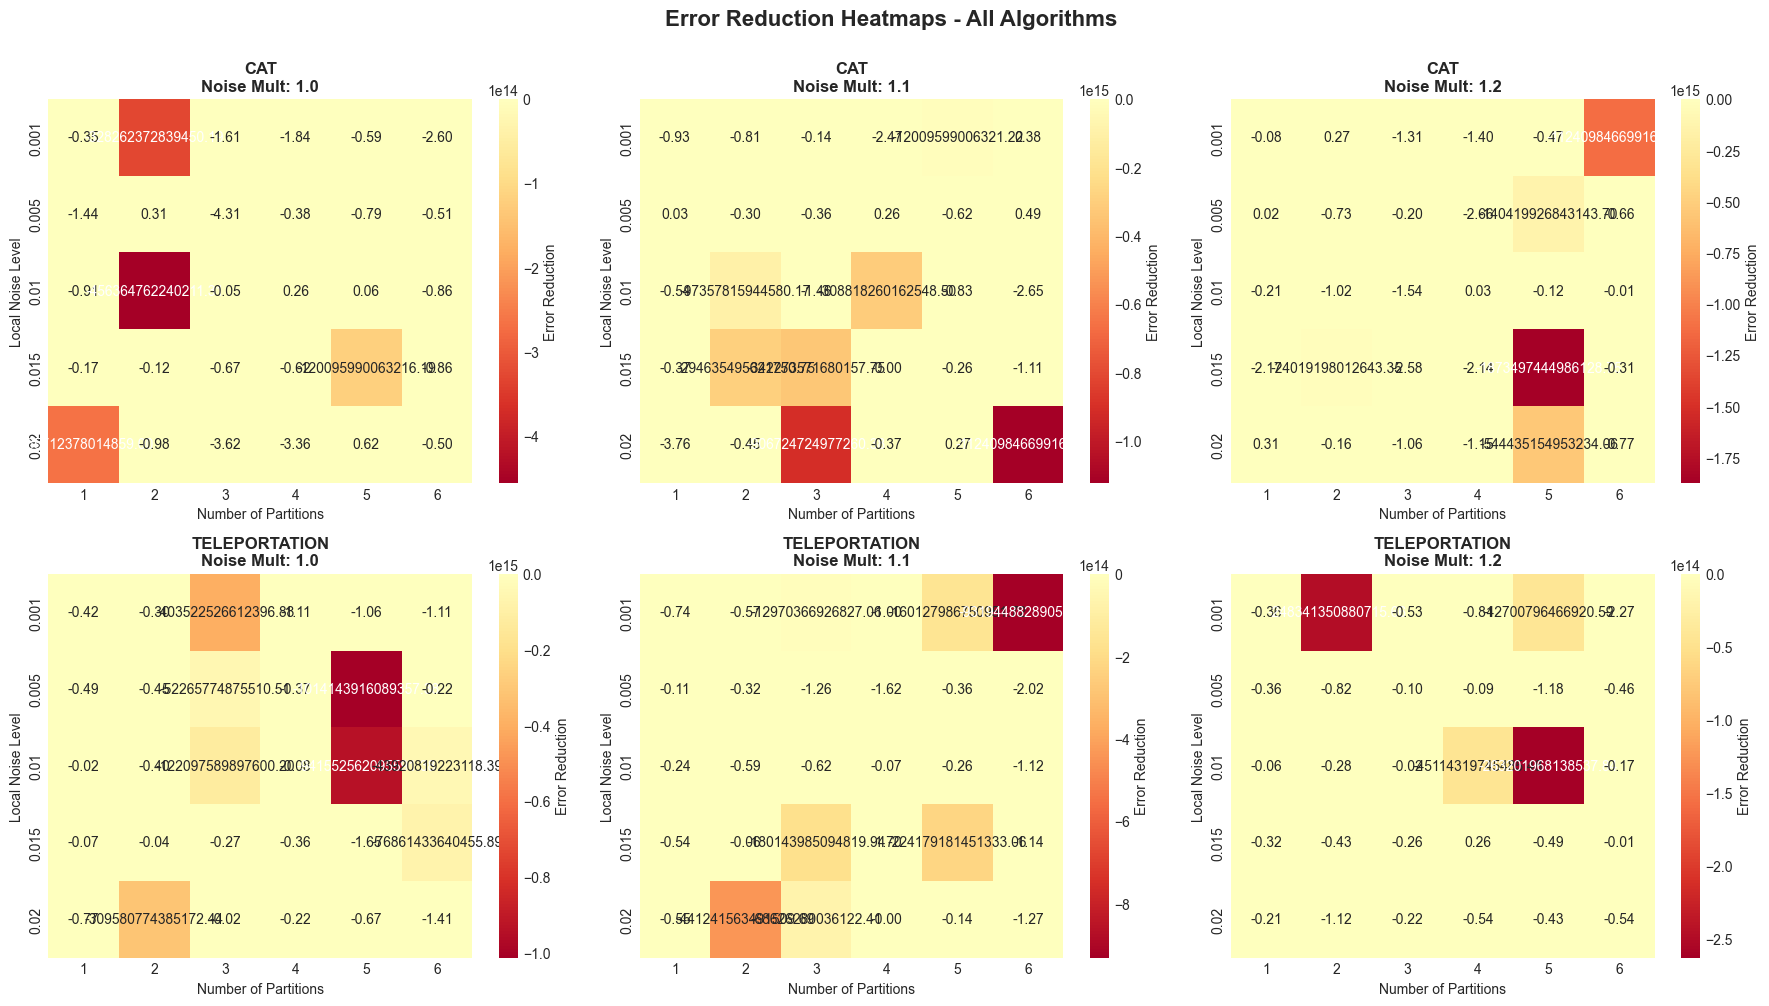

Saved: plots/heatmap_error_reduction_combined.png


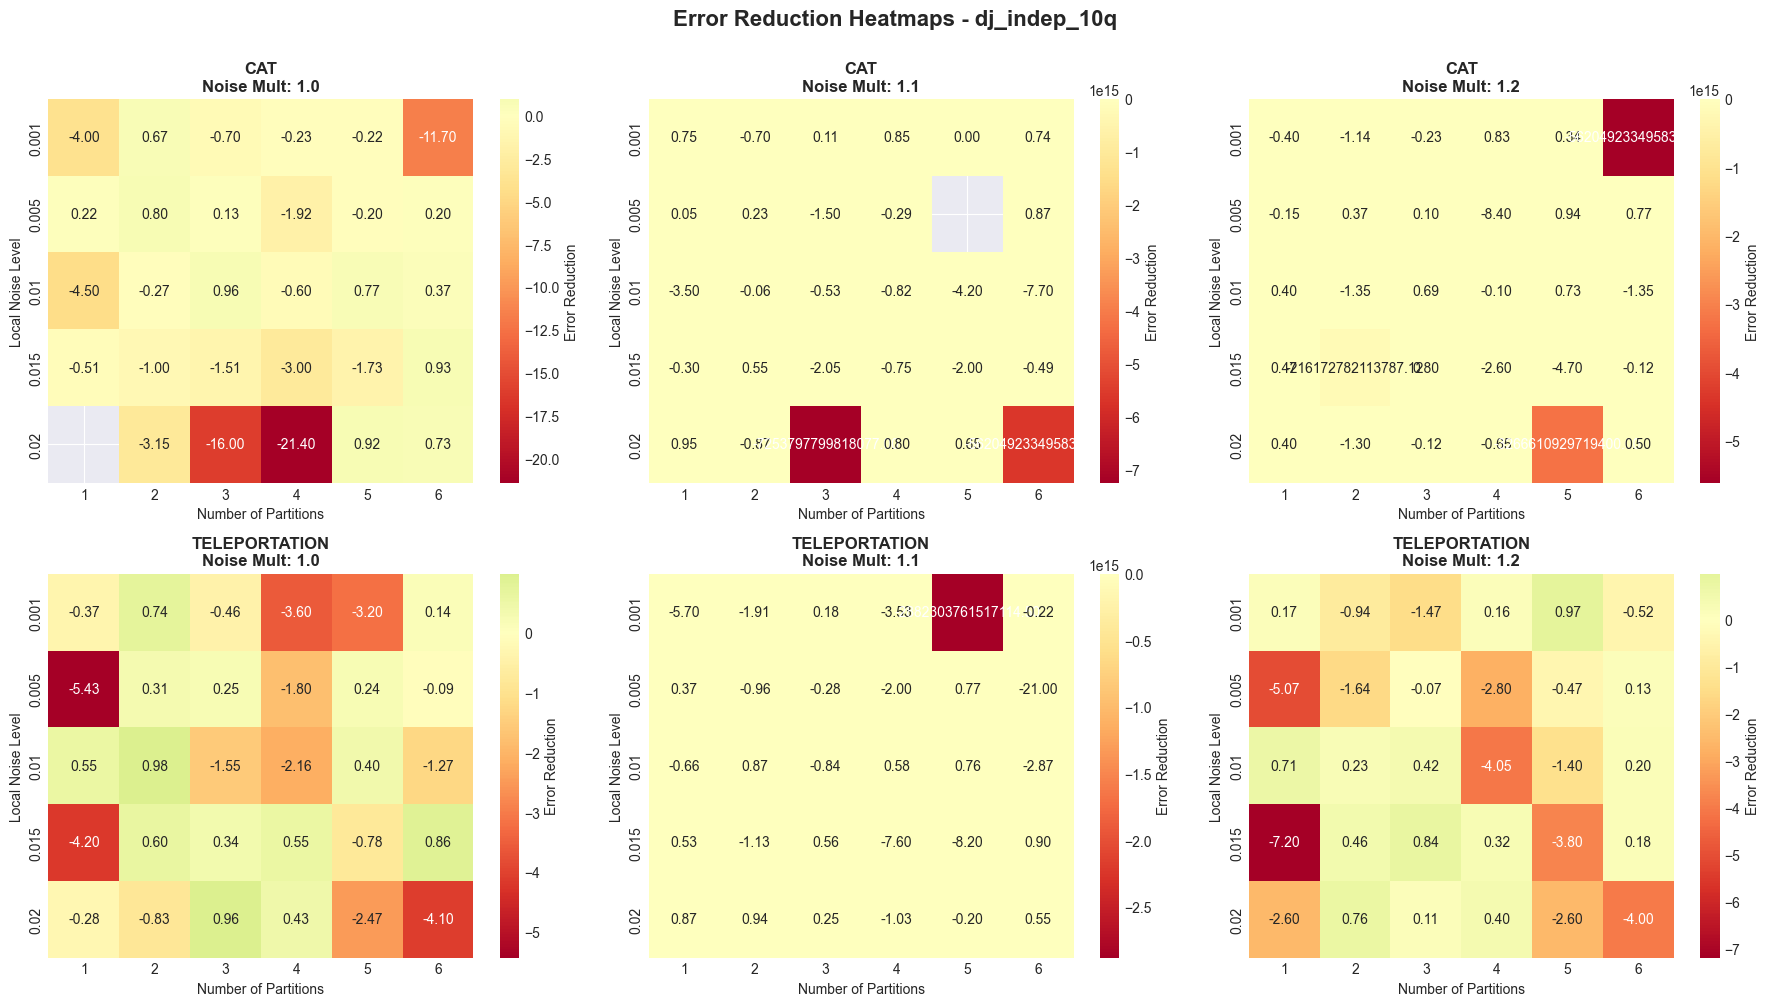

Saved: plots/heatmap_error_reduction_dj_indep_10q.png


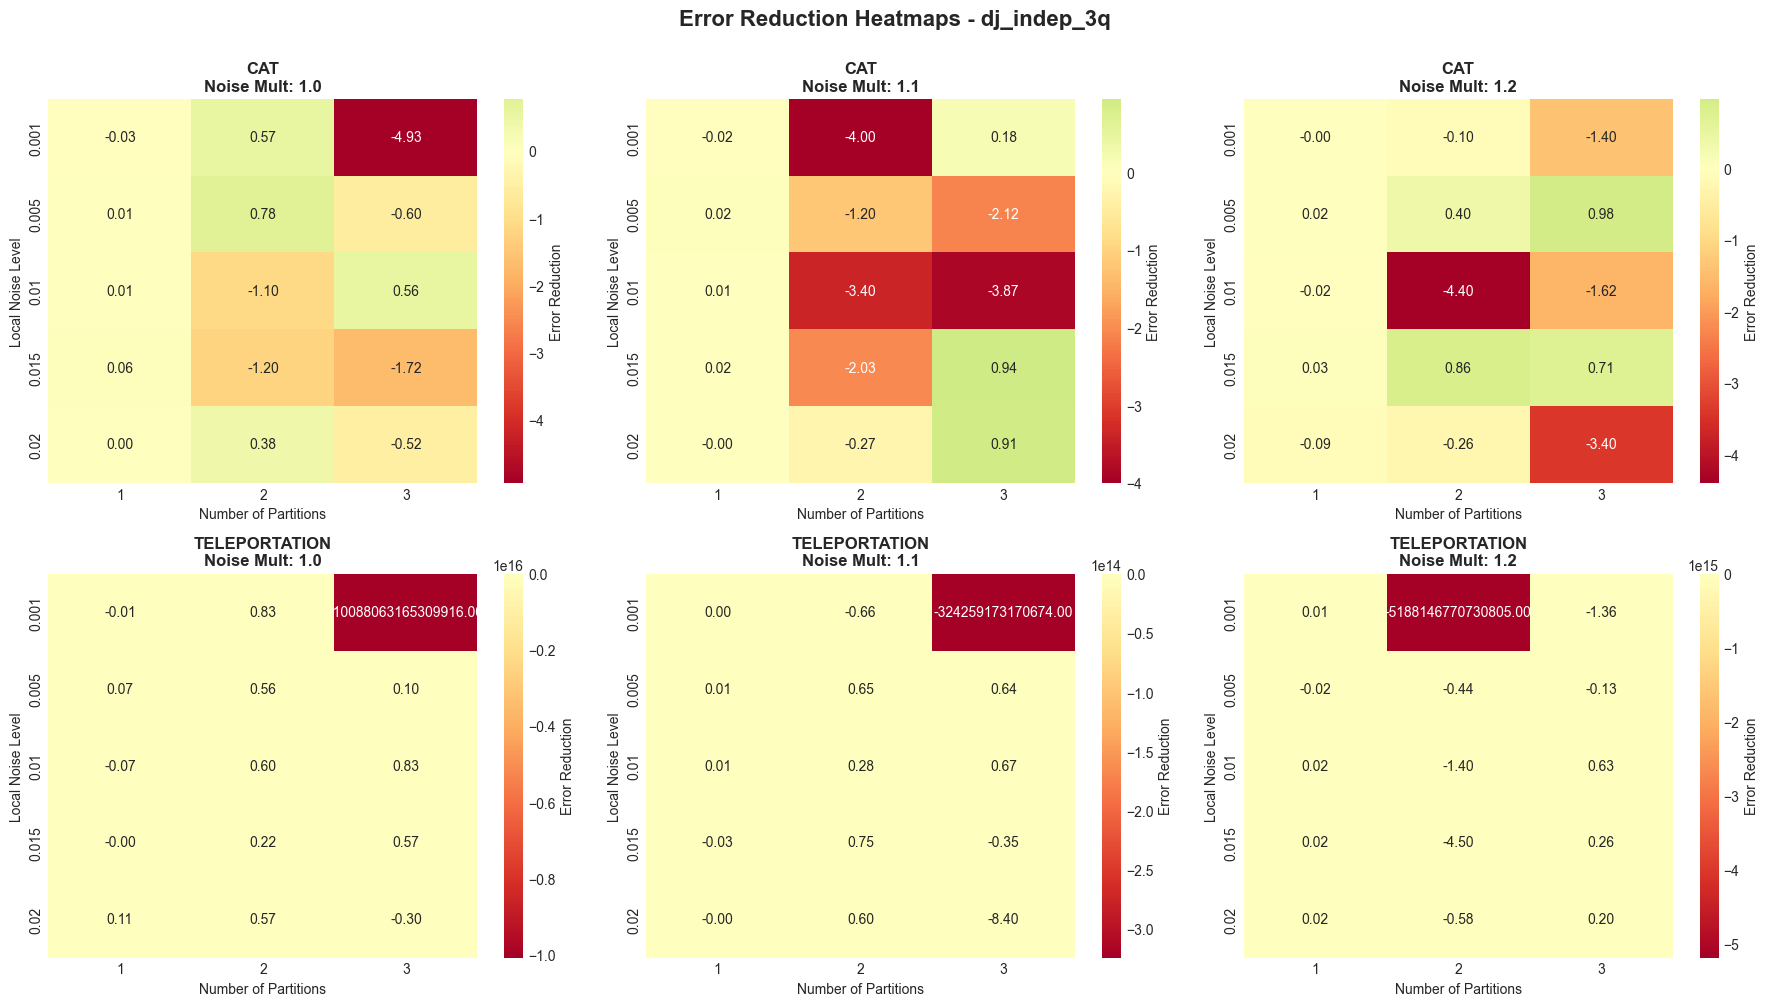

Saved: plots/heatmap_error_reduction_dj_indep_3q.png


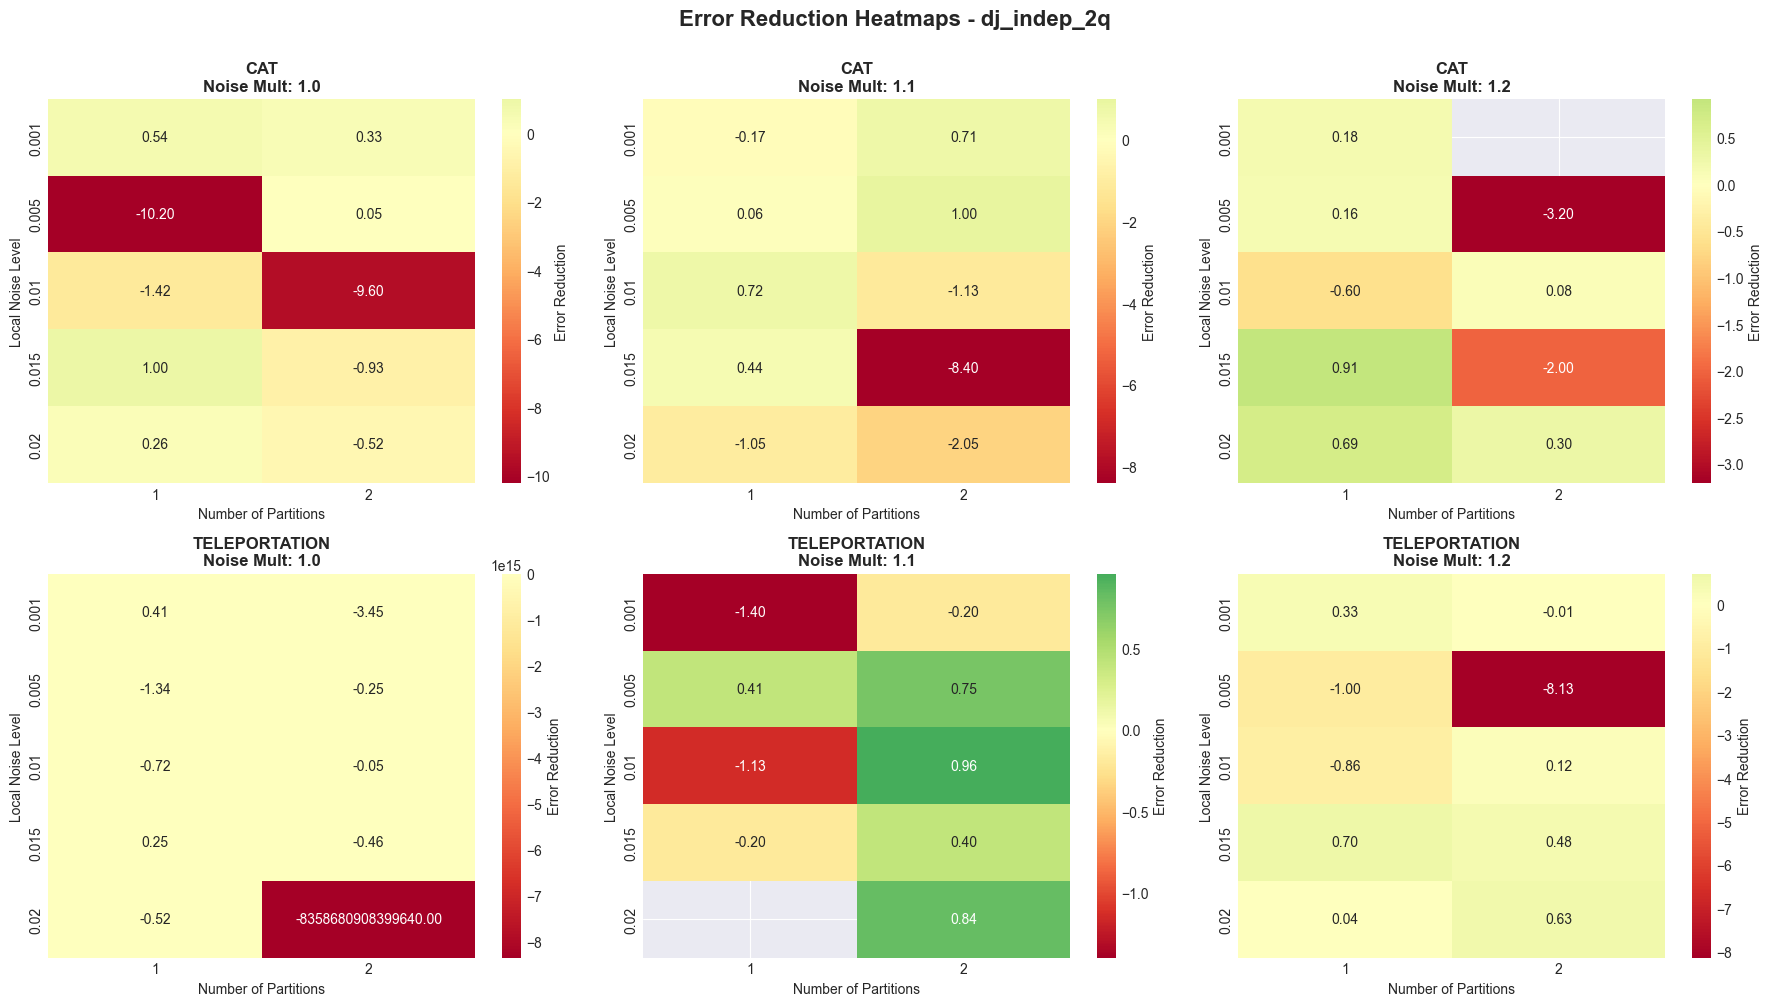

Saved: plots/heatmap_error_reduction_dj_indep_2q.png


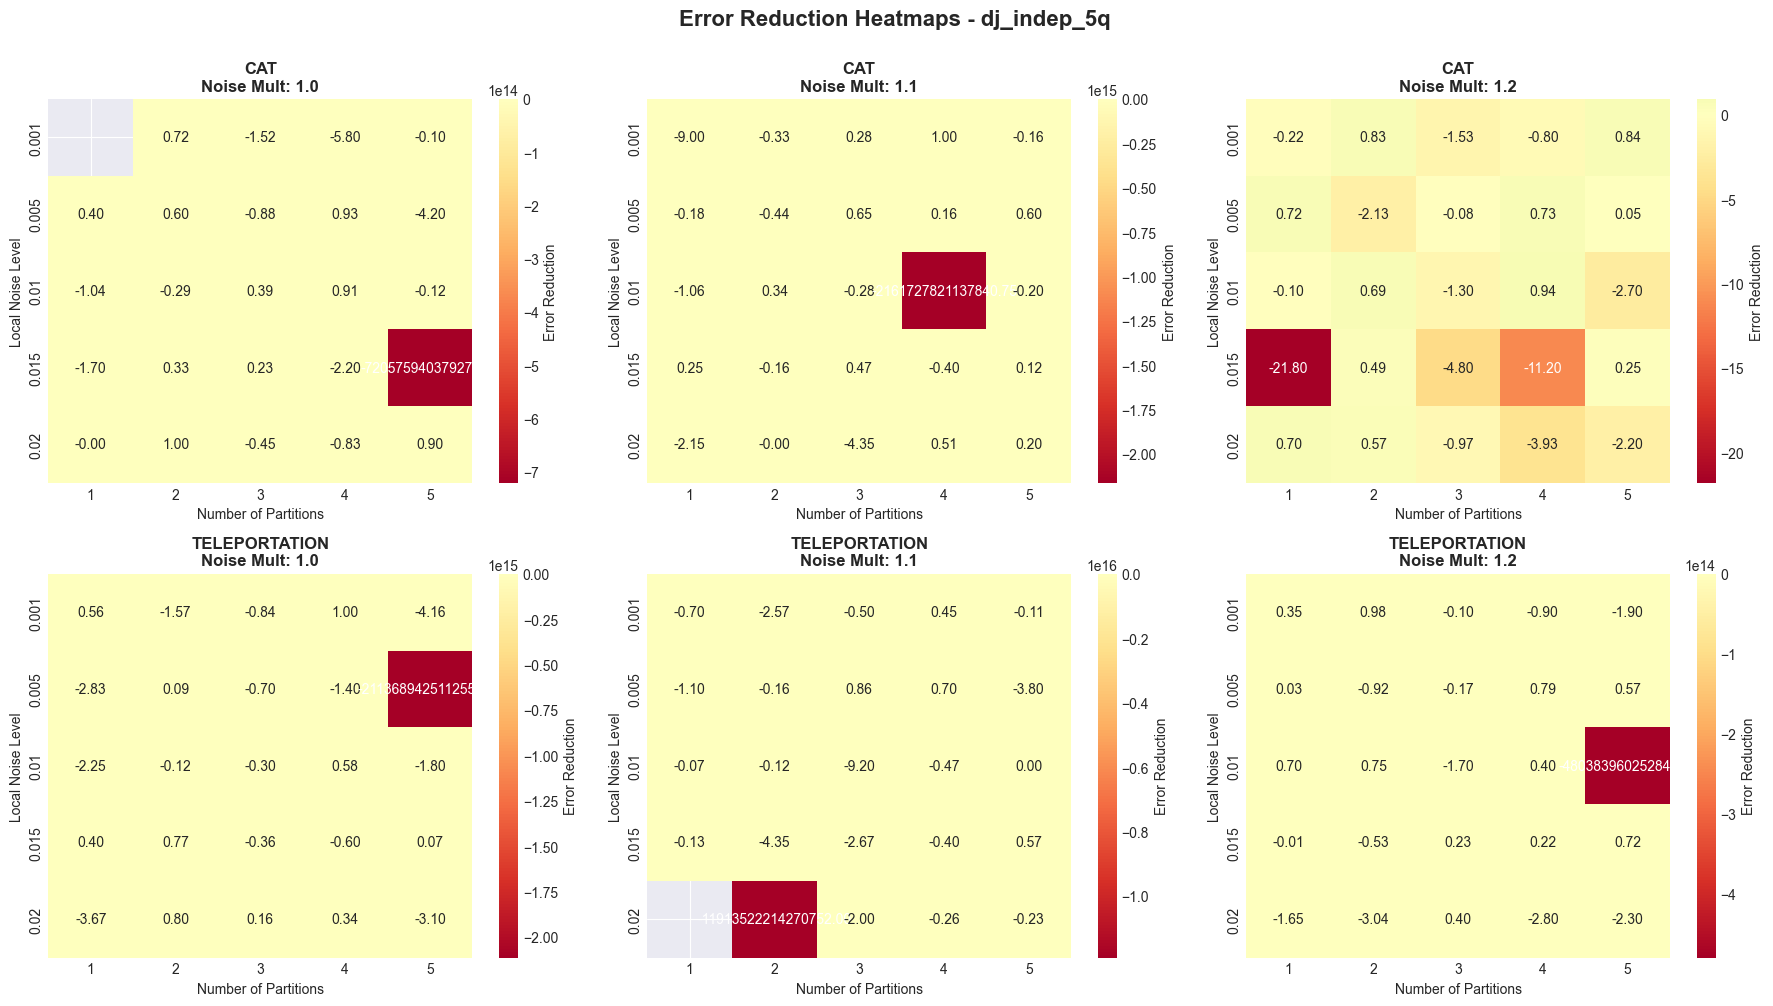

Saved: plots/heatmap_error_reduction_dj_indep_5q.png


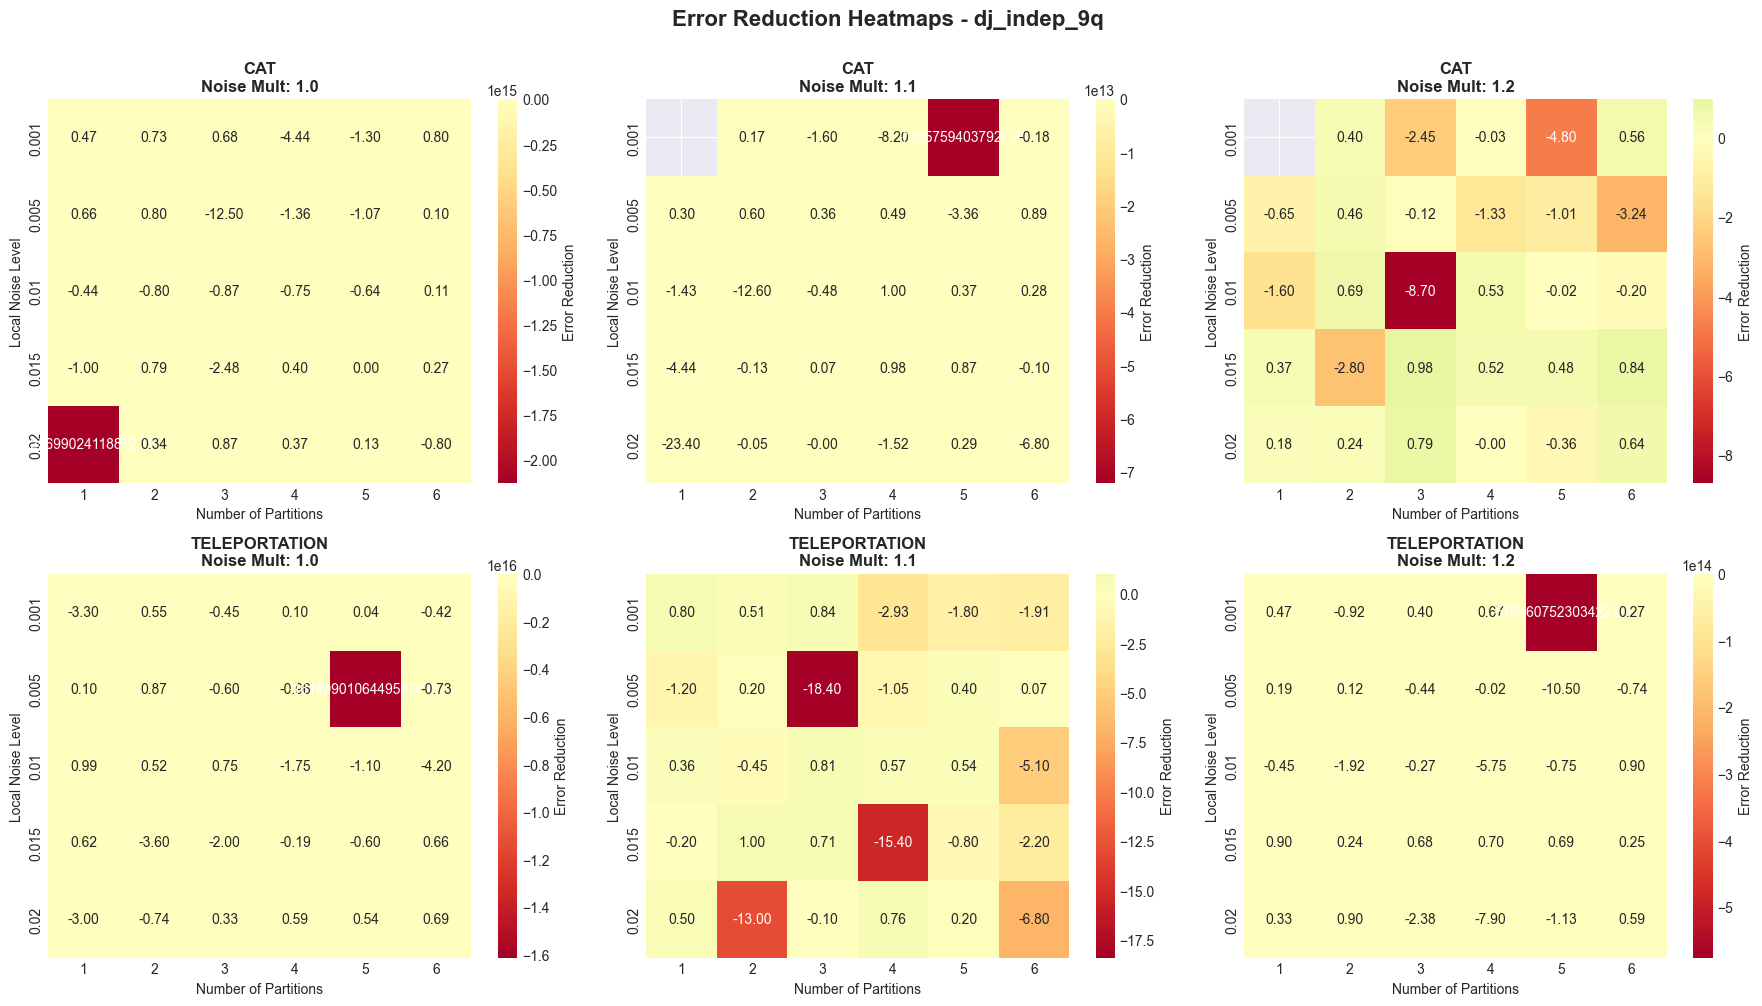

Saved: plots/heatmap_error_reduction_dj_indep_9q.png


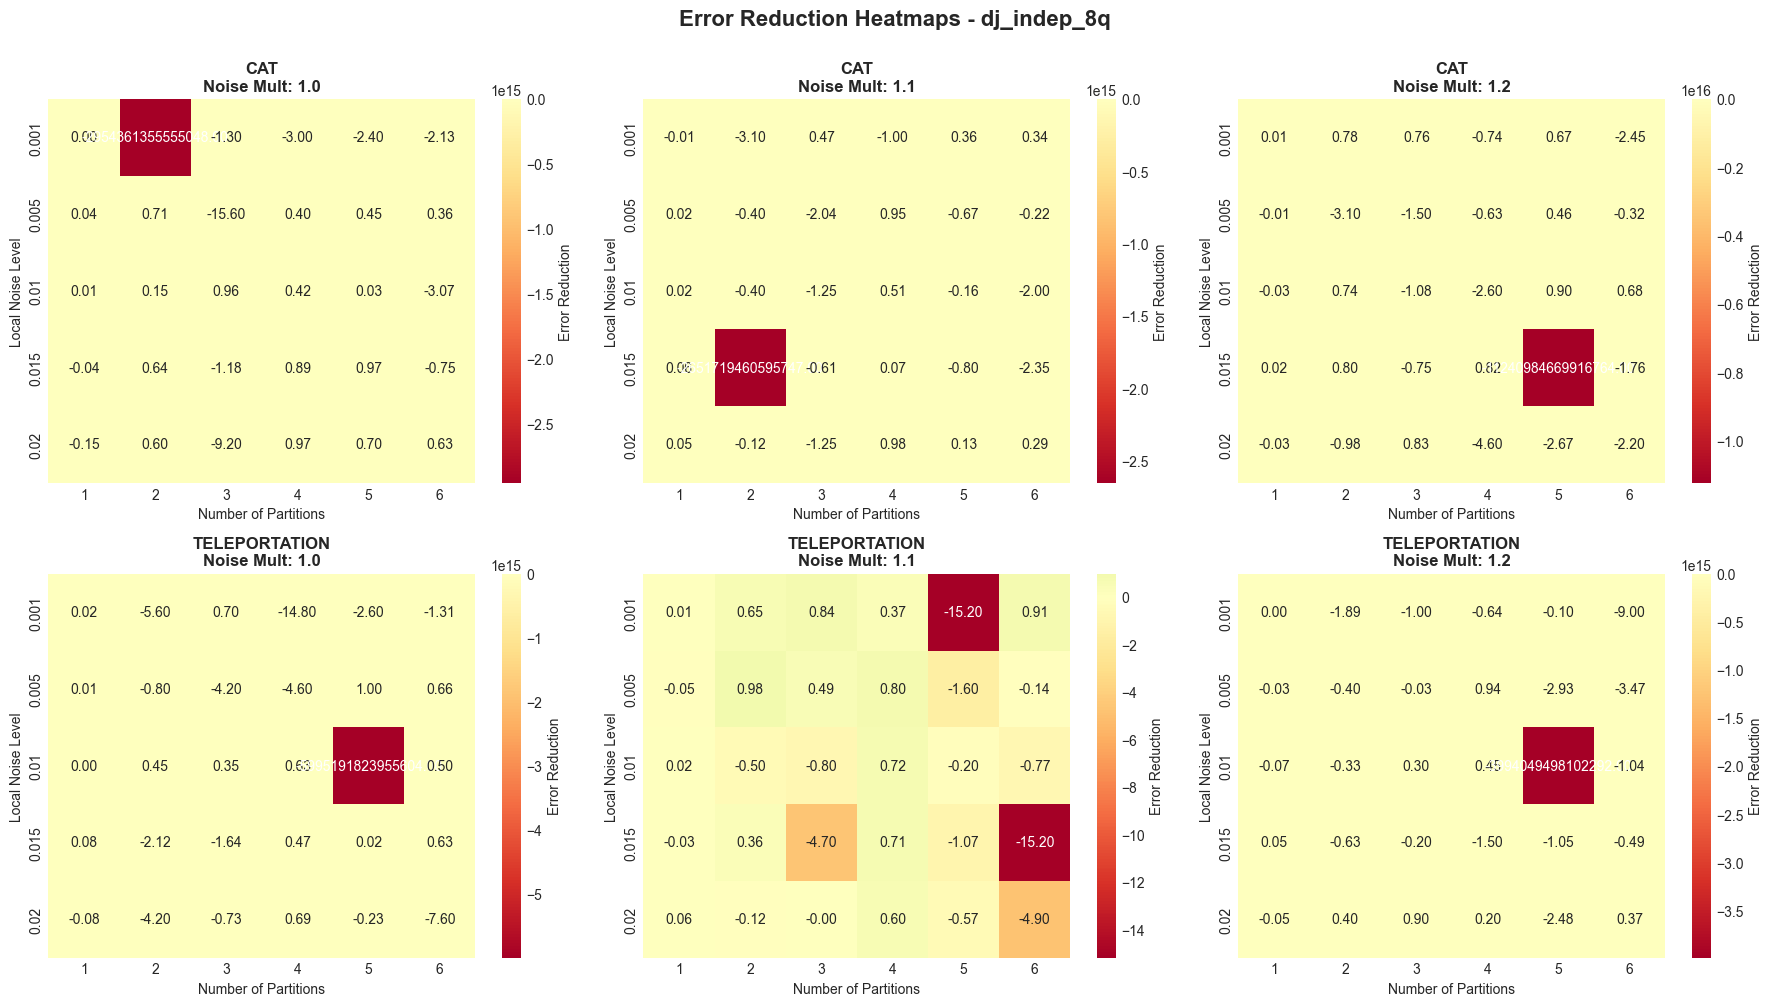

Saved: plots/heatmap_error_reduction_dj_indep_8q.png


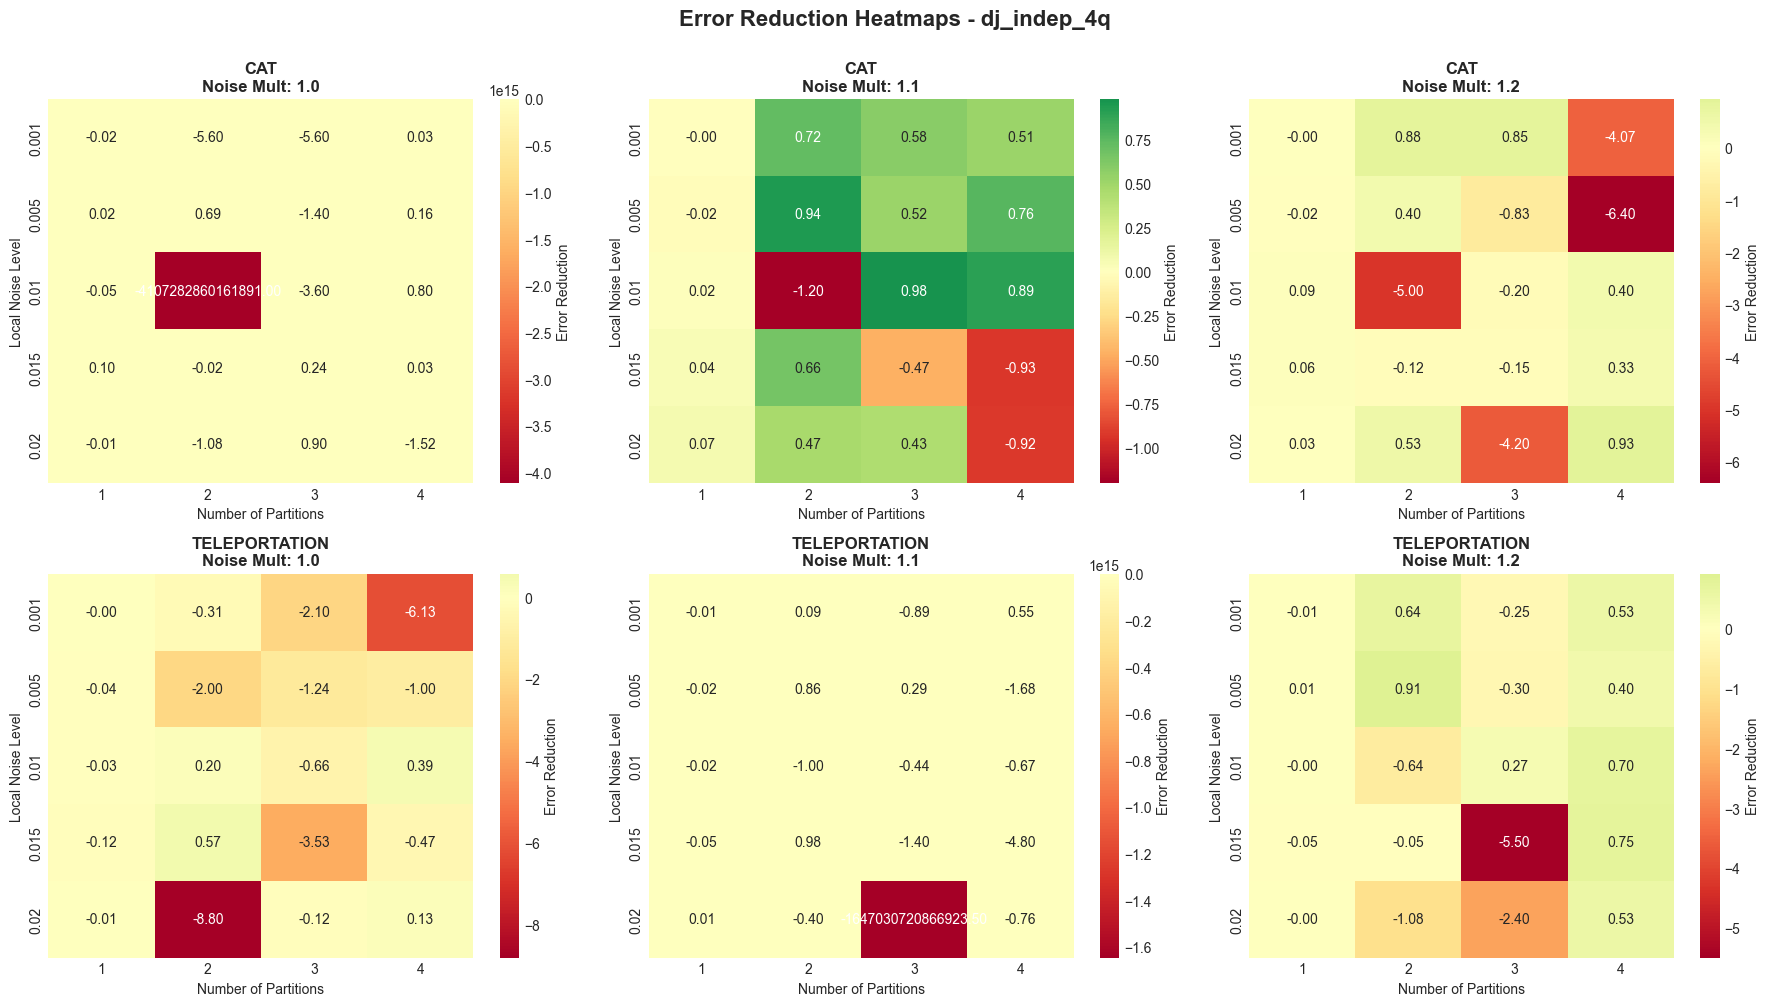

Saved: plots/heatmap_error_reduction_dj_indep_4q.png


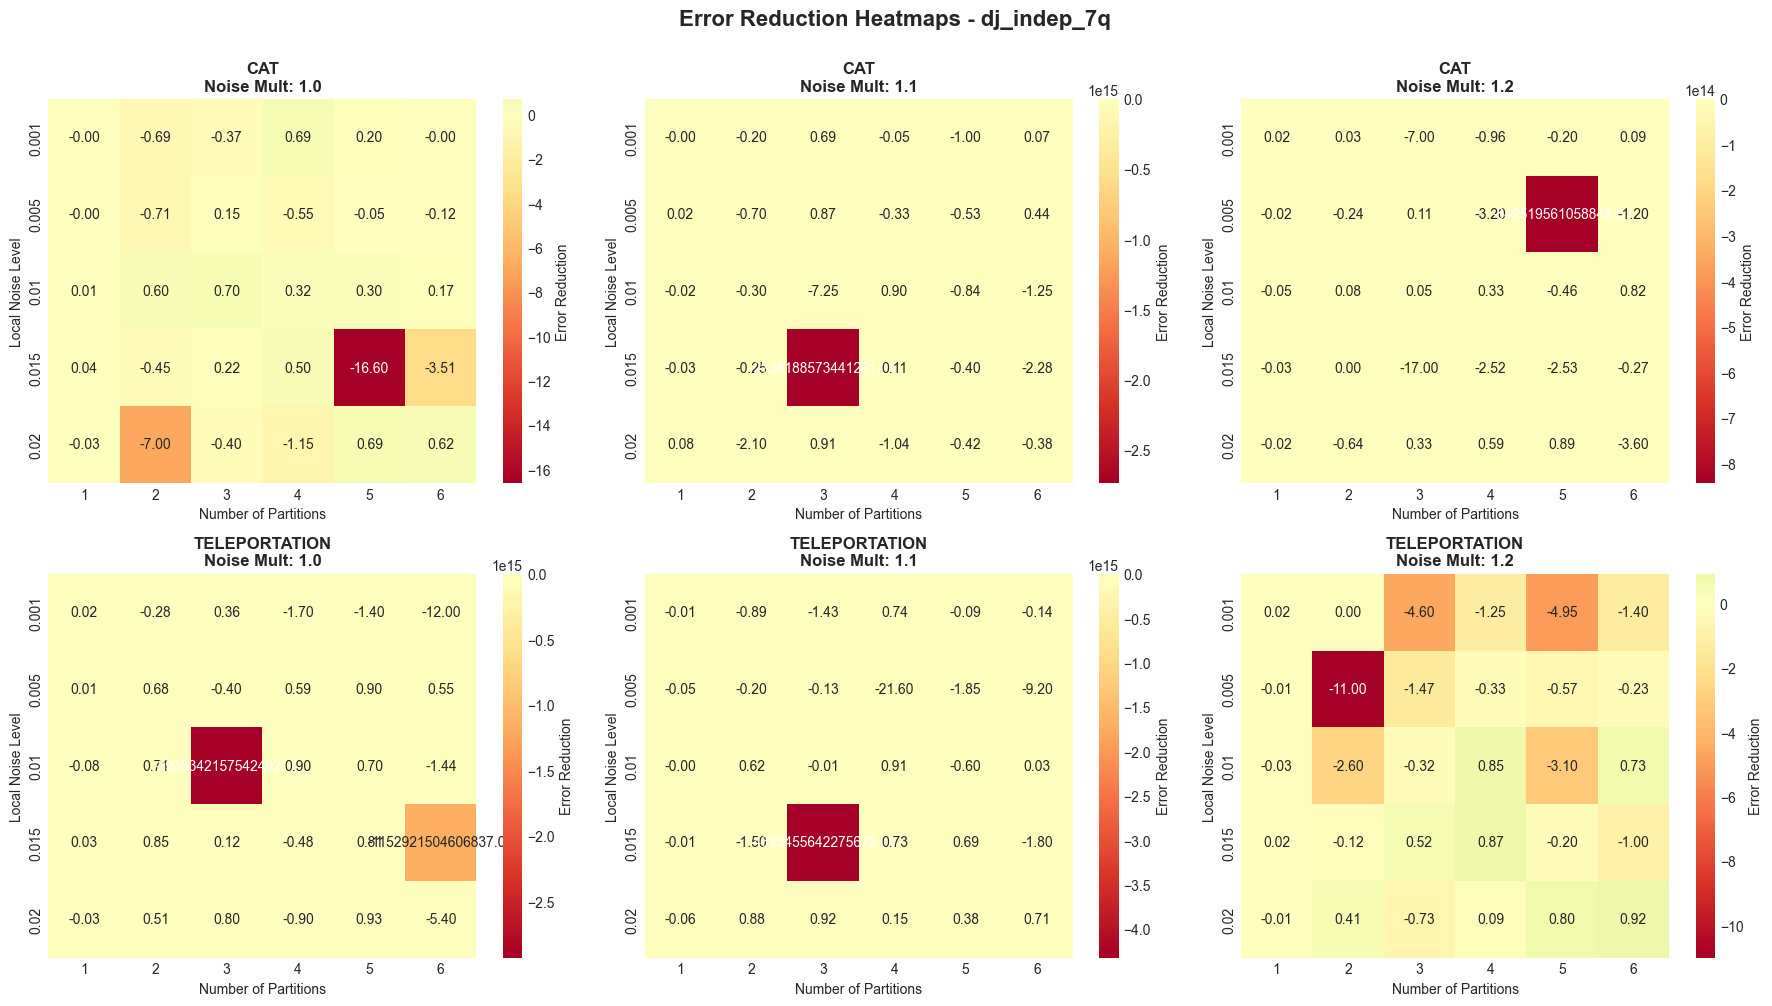

Saved: plots/heatmap_error_reduction_dj_indep_7q.png


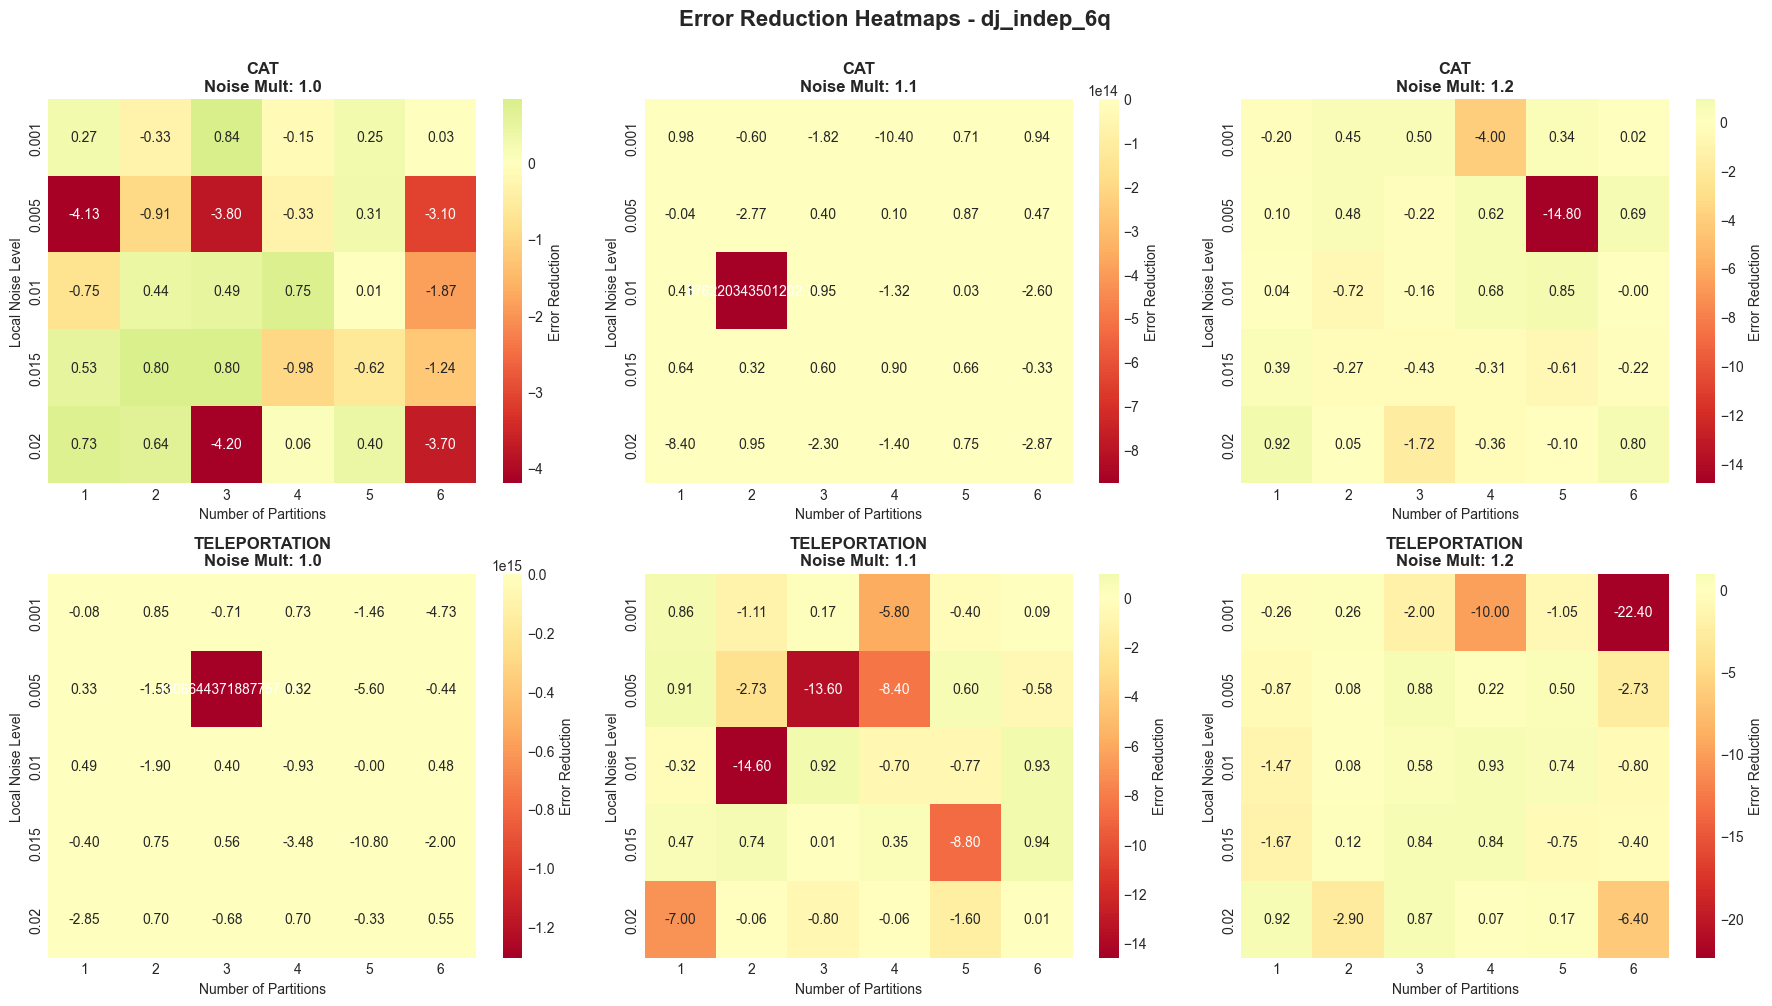

Saved: plots/heatmap_error_reduction_dj_indep_6q.png


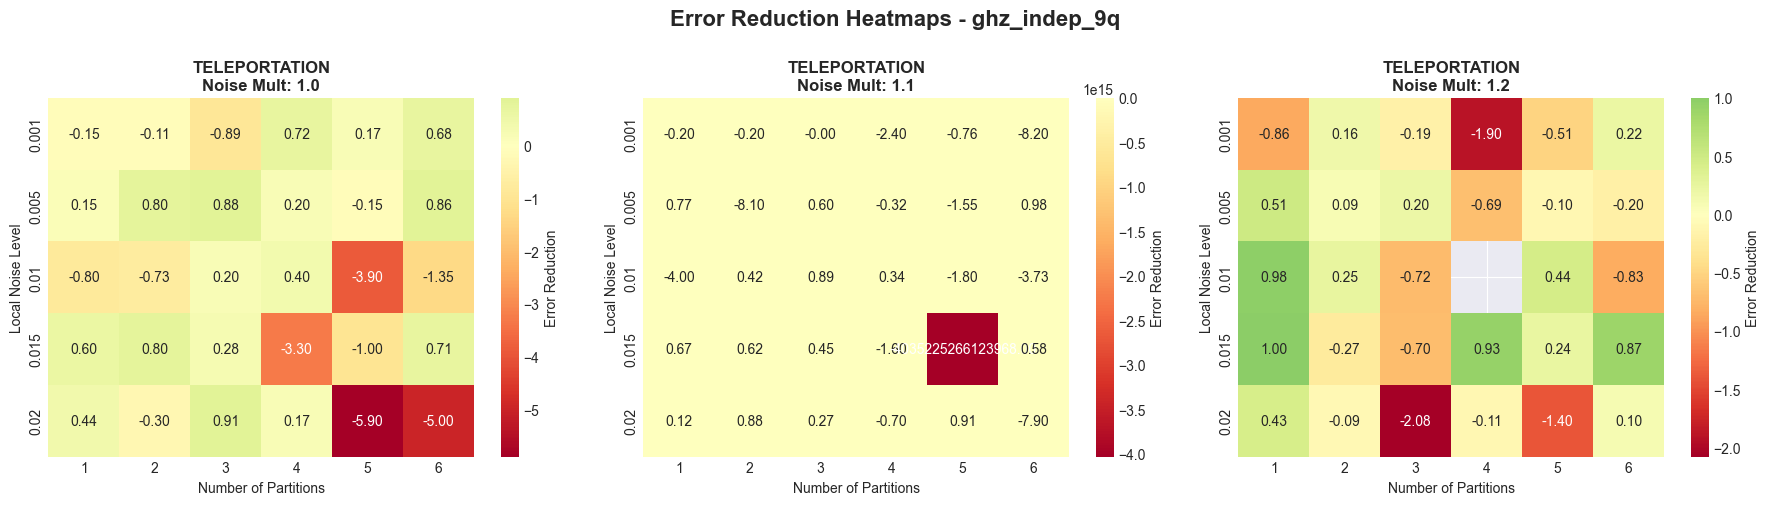

Saved: plots/heatmap_error_reduction_ghz_indep_9q.png


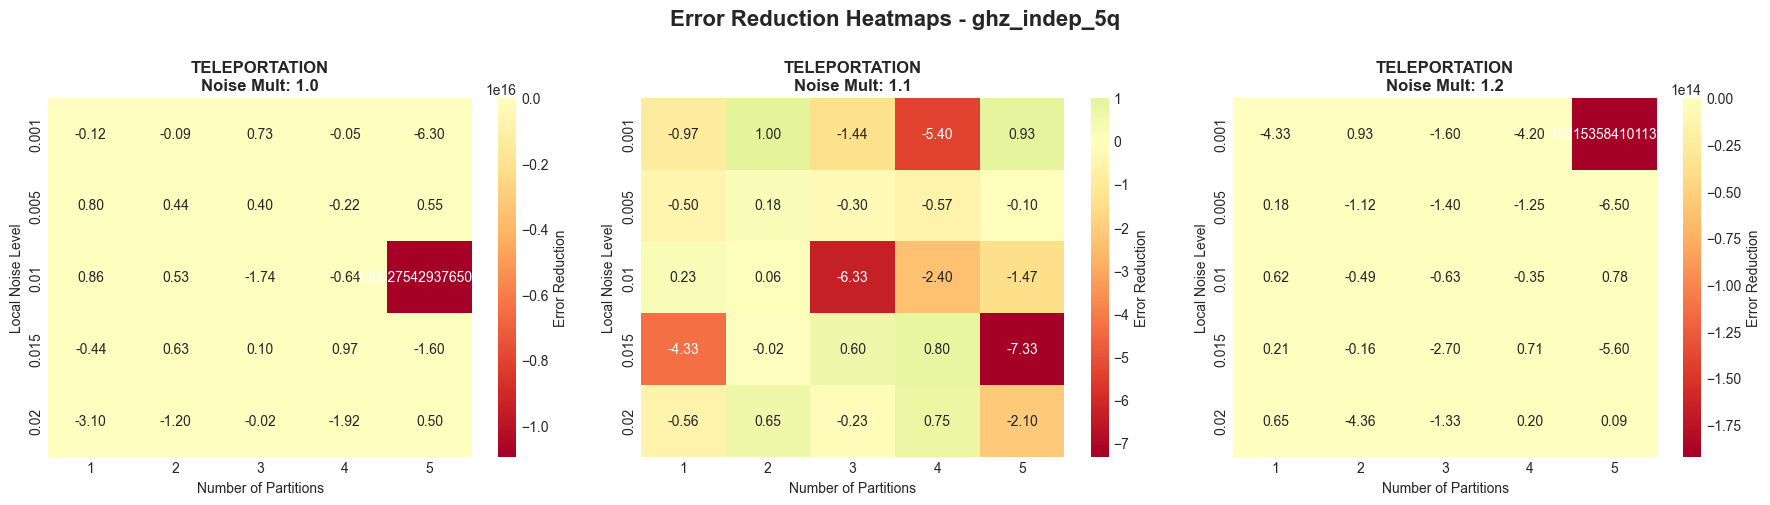

Saved: plots/heatmap_error_reduction_ghz_indep_5q.png


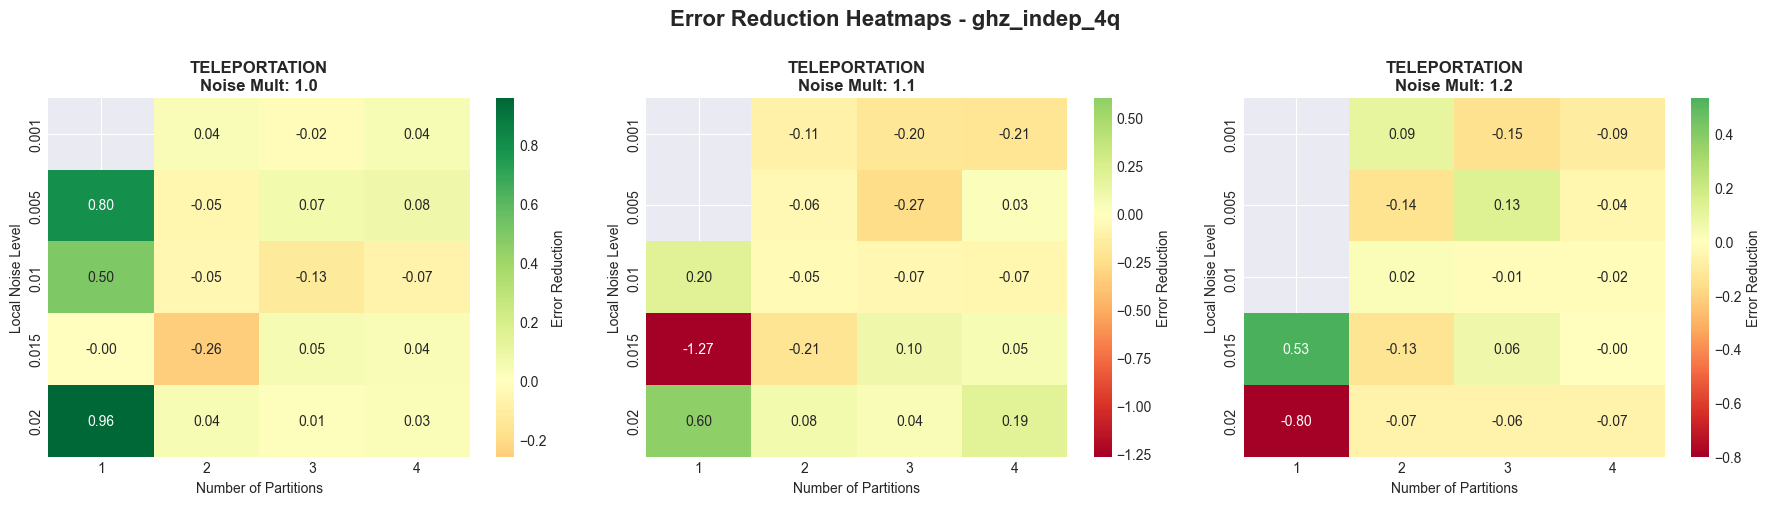

Saved: plots/heatmap_error_reduction_ghz_indep_4q.png


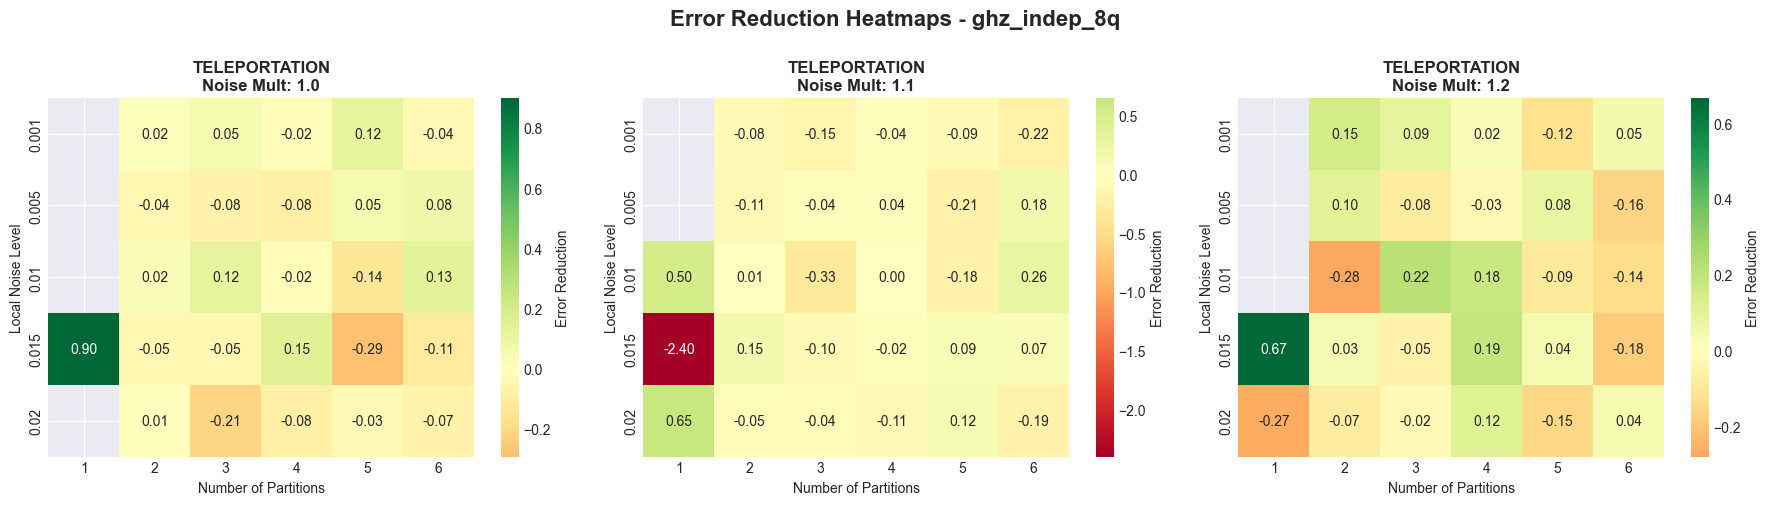

Saved: plots/heatmap_error_reduction_ghz_indep_8q.png


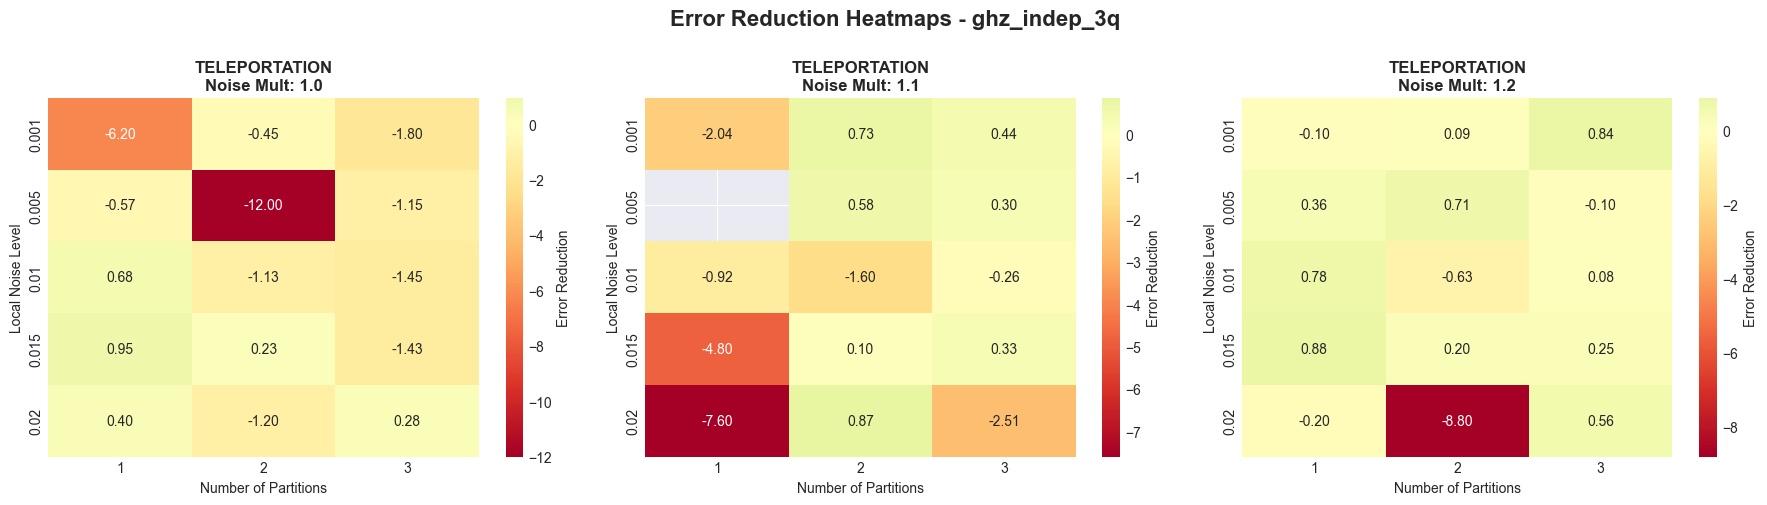

Saved: plots/heatmap_error_reduction_ghz_indep_3q.png


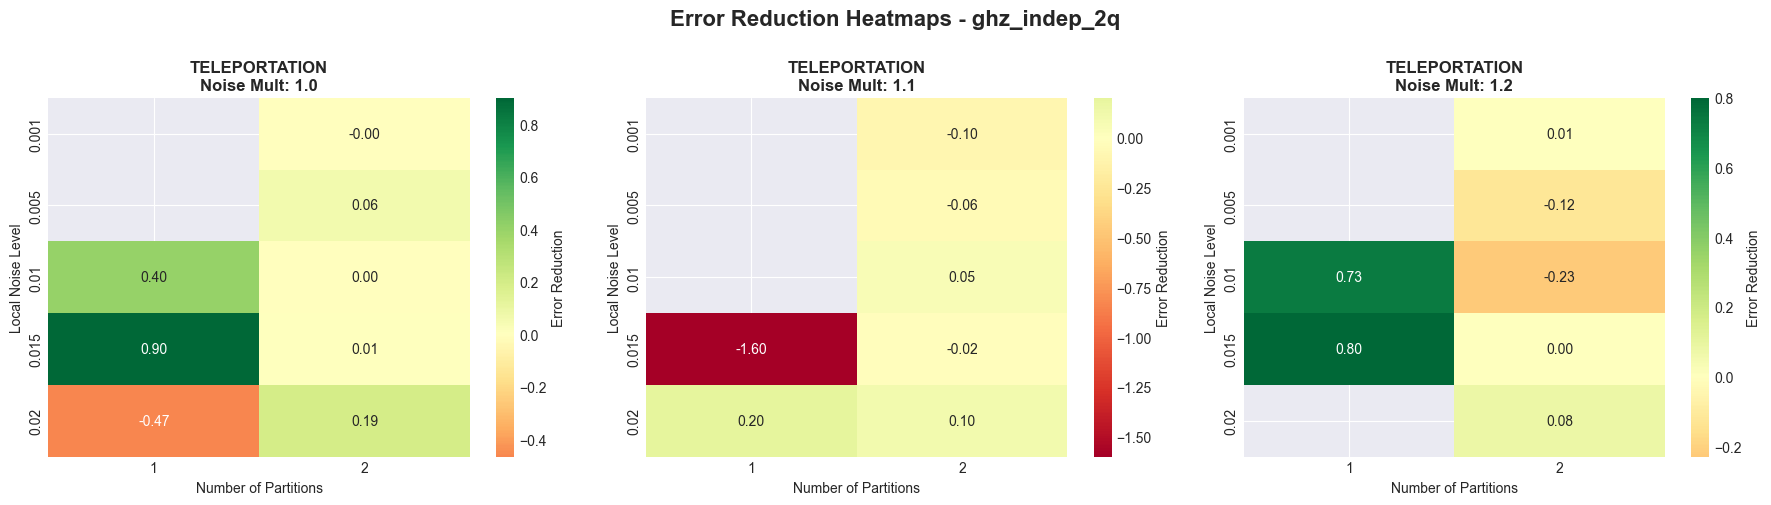

Saved: plots/heatmap_error_reduction_ghz_indep_2q.png


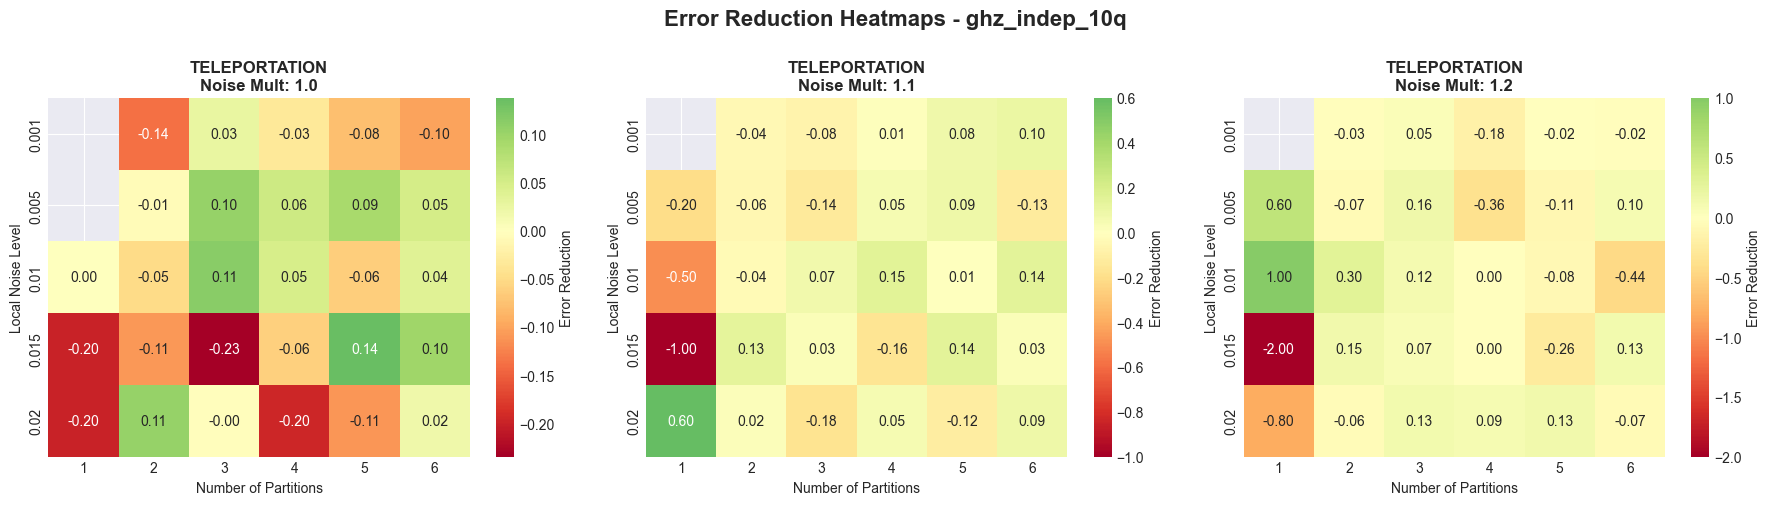

Saved: plots/heatmap_error_reduction_ghz_indep_10q.png


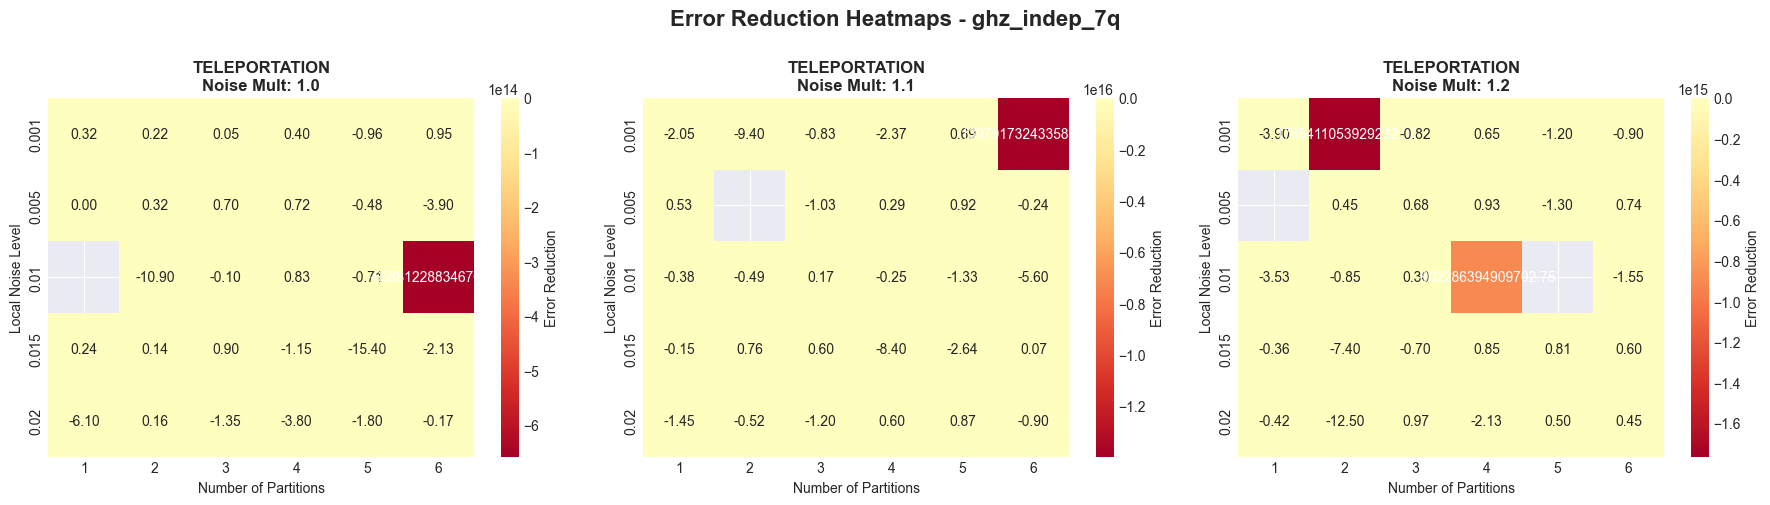

Saved: plots/heatmap_error_reduction_ghz_indep_7q.png


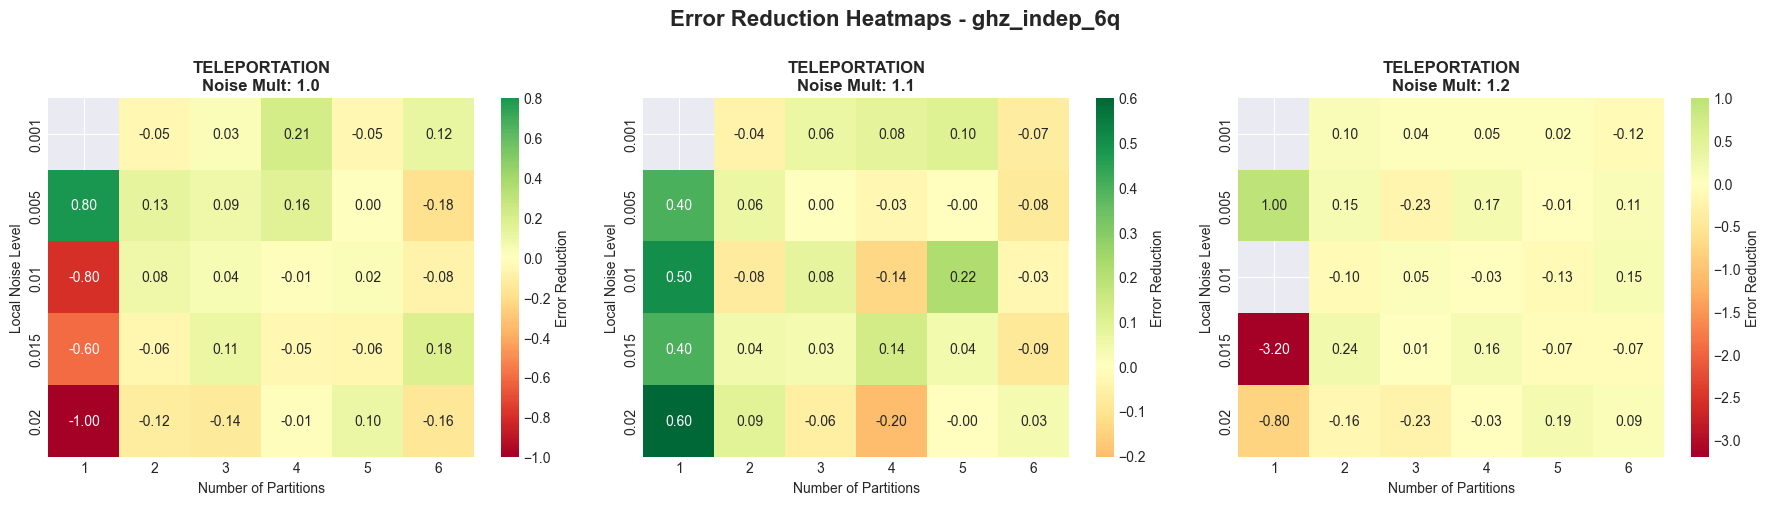

Saved: plots/heatmap_error_reduction_ghz_indep_6q.png


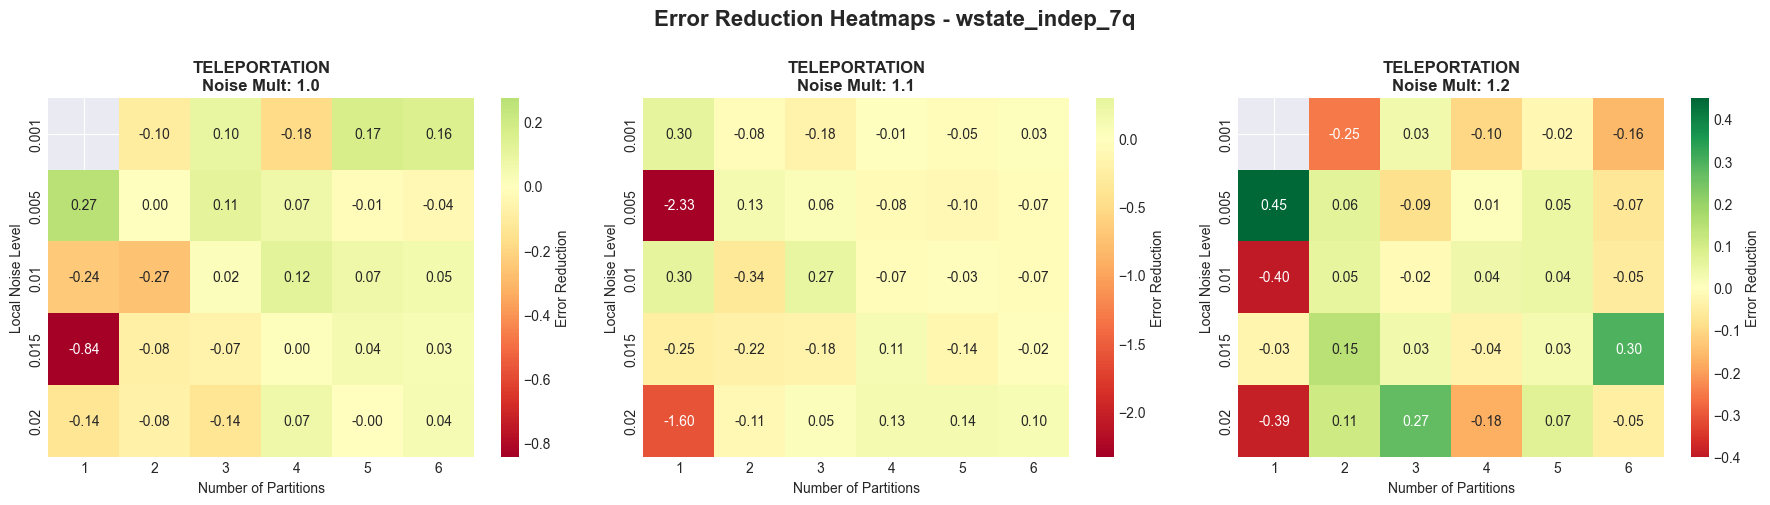

Saved: plots/heatmap_error_reduction_wstate_indep_7q.png


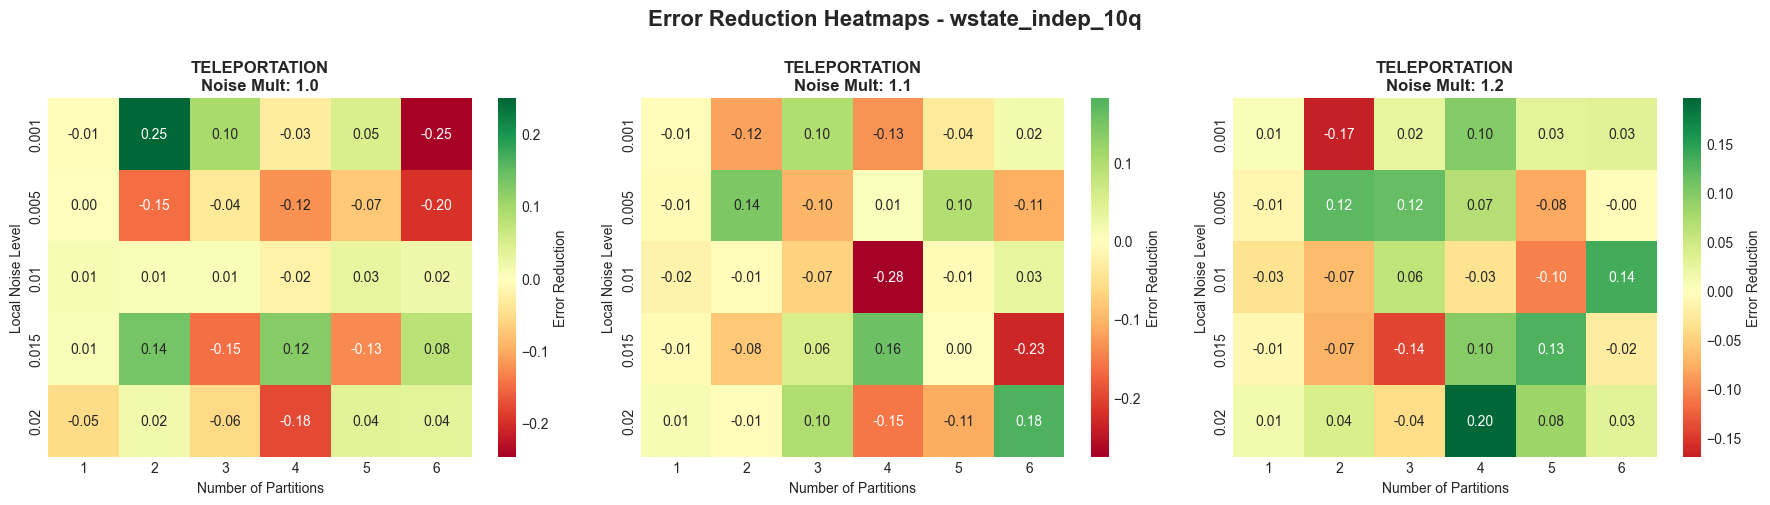

Saved: plots/heatmap_error_reduction_wstate_indep_10q.png


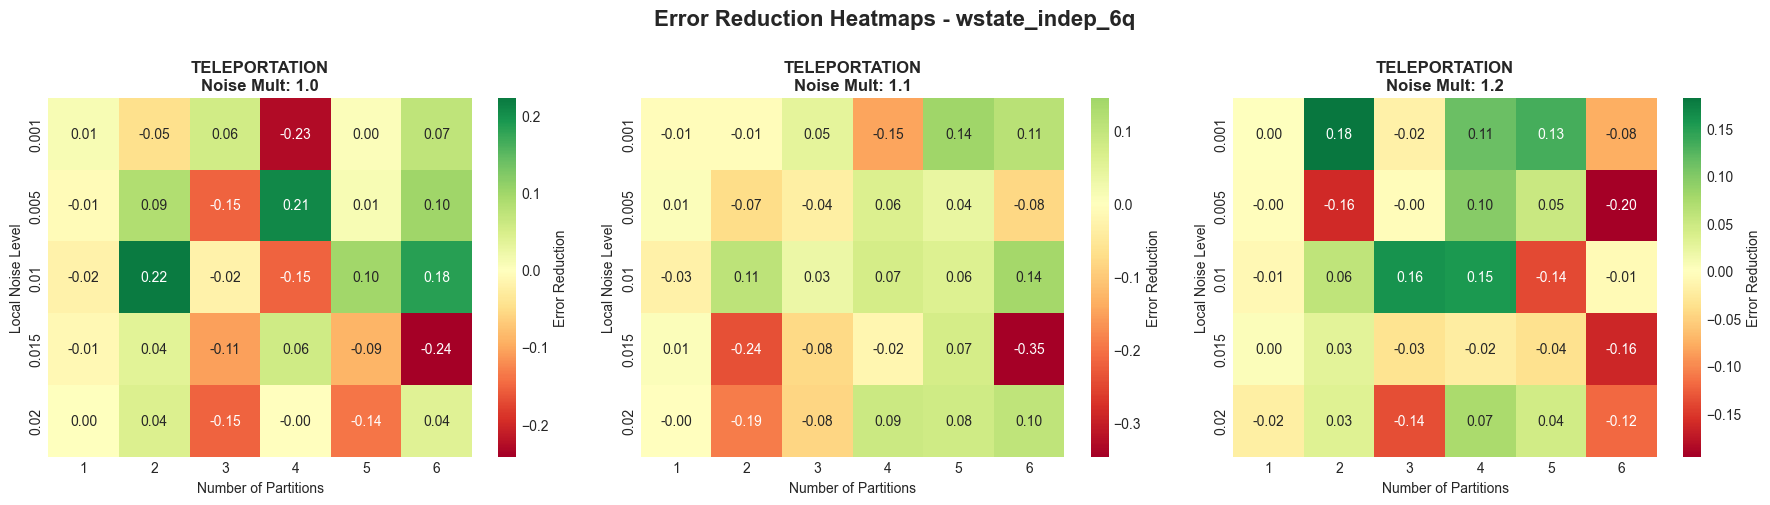

Saved: plots/heatmap_error_reduction_wstate_indep_6q.png


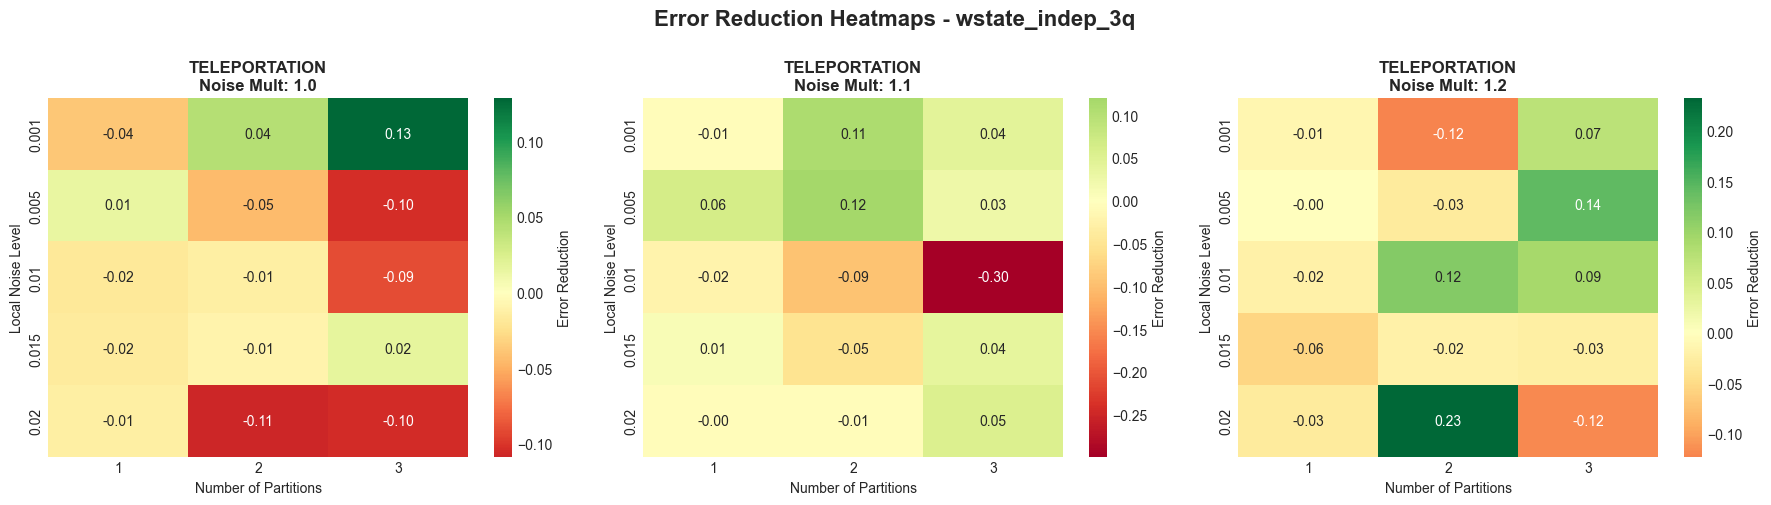

Saved: plots/heatmap_error_reduction_wstate_indep_3q.png


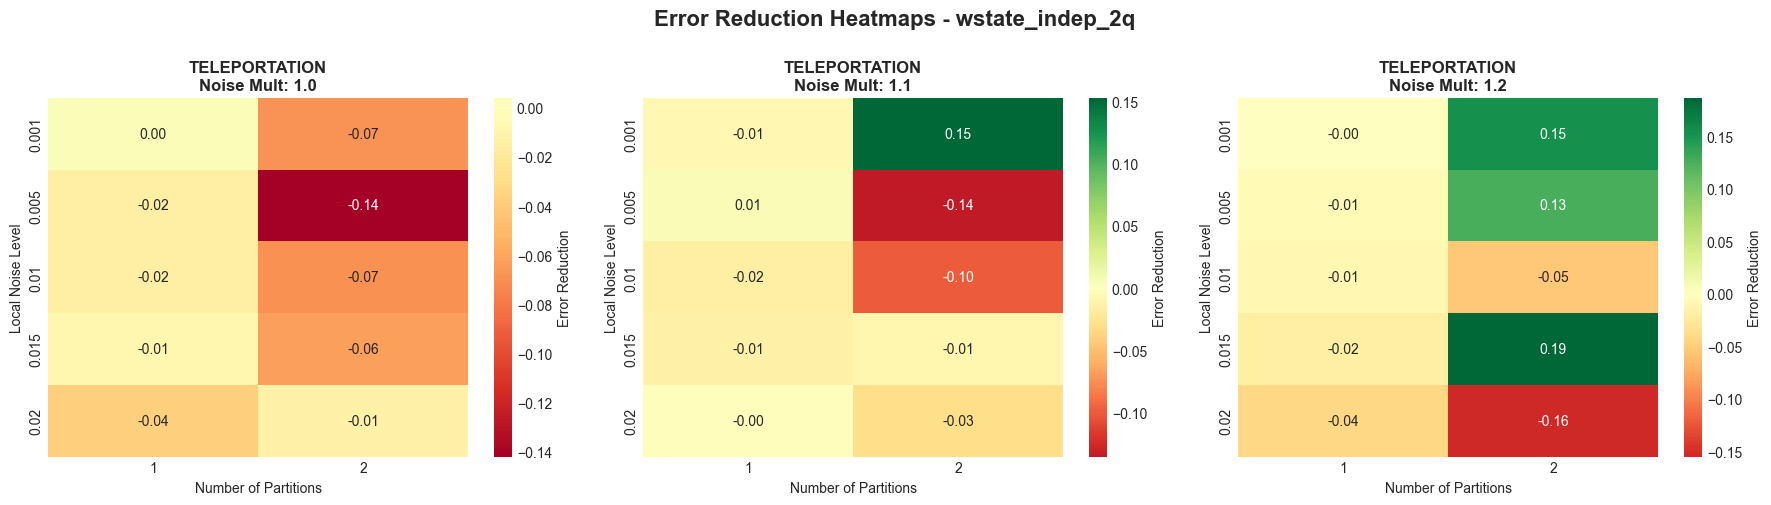

Saved: plots/heatmap_error_reduction_wstate_indep_2q.png


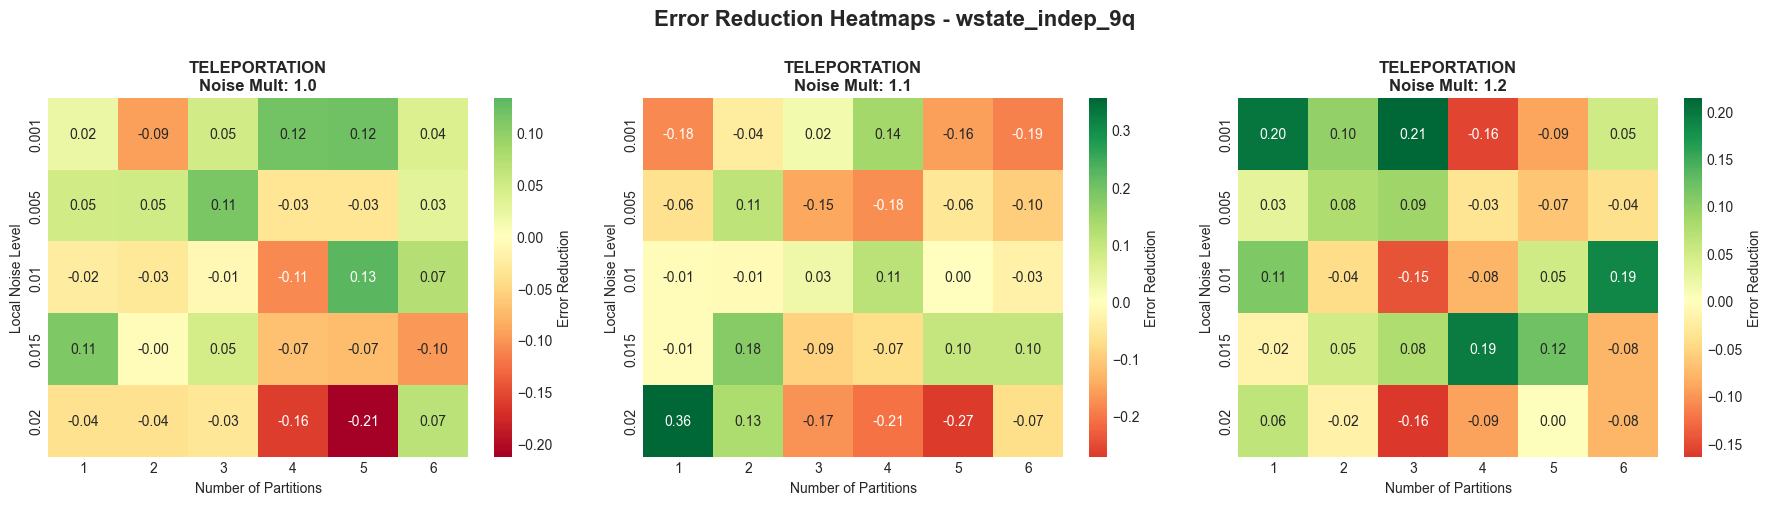

Saved: plots/heatmap_error_reduction_wstate_indep_9q.png


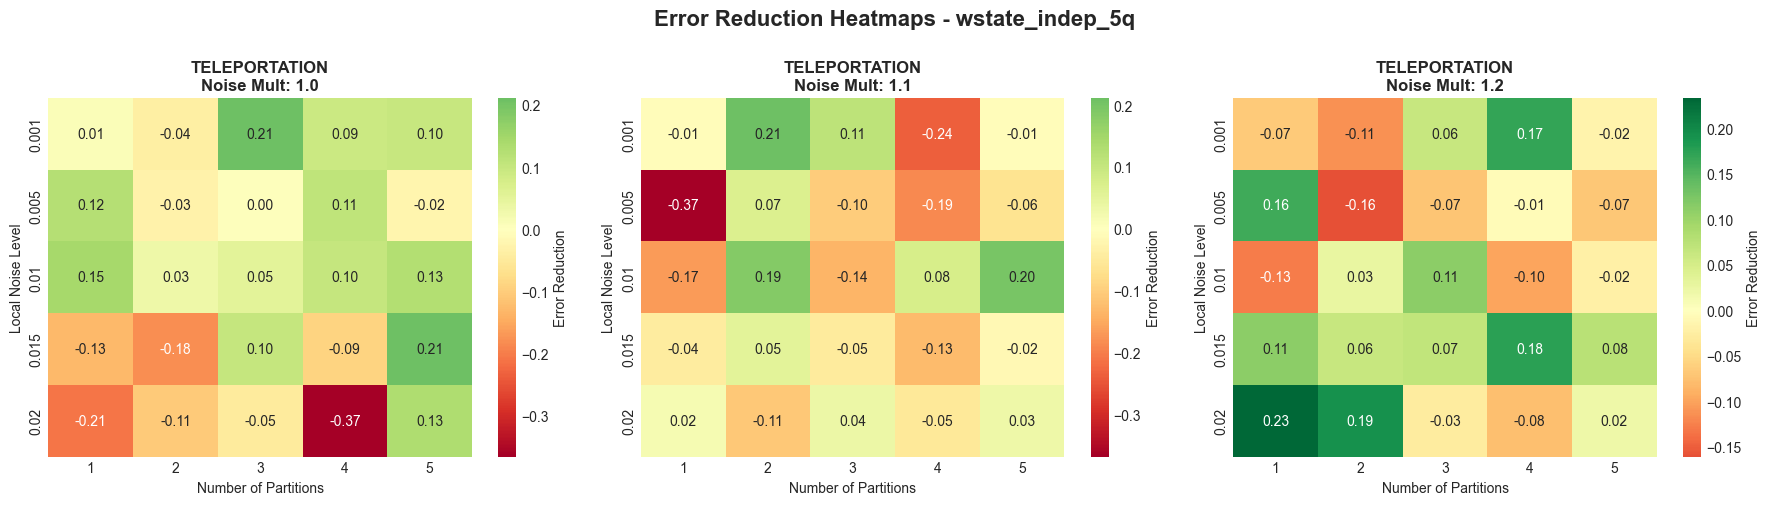

Saved: plots/heatmap_error_reduction_wstate_indep_5q.png


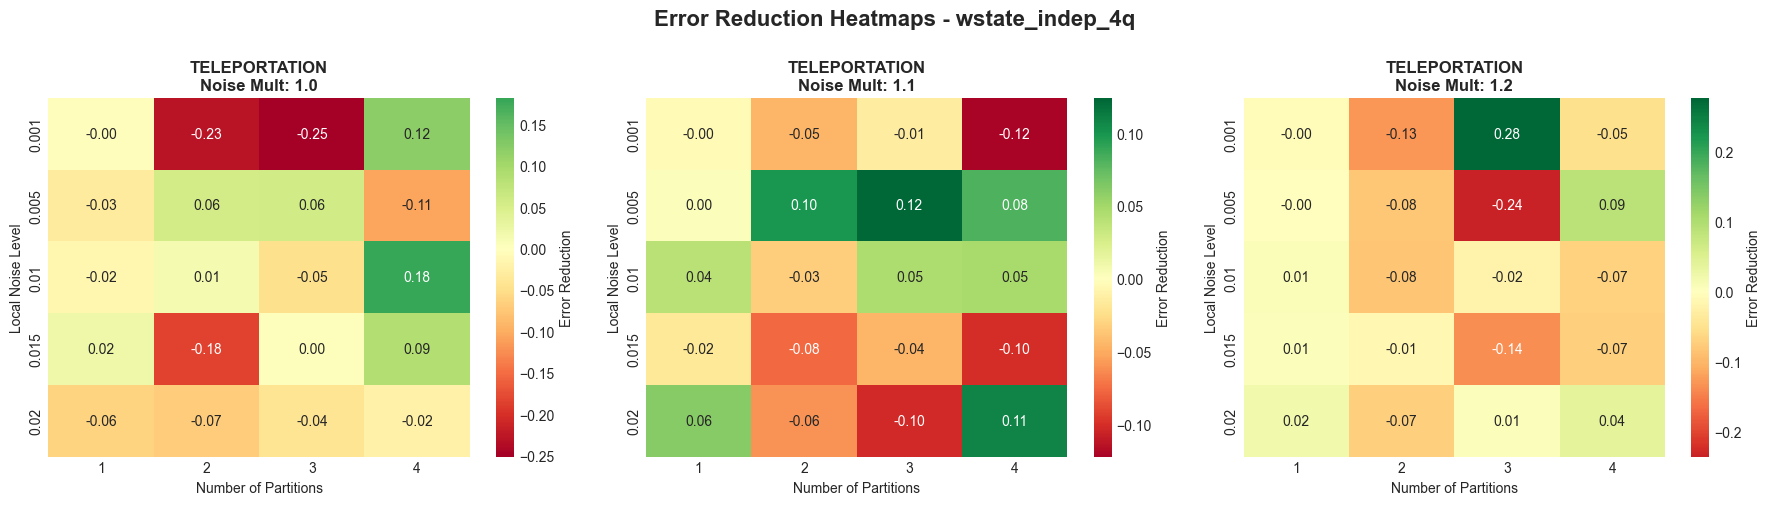

Saved: plots/heatmap_error_reduction_wstate_indep_4q.png


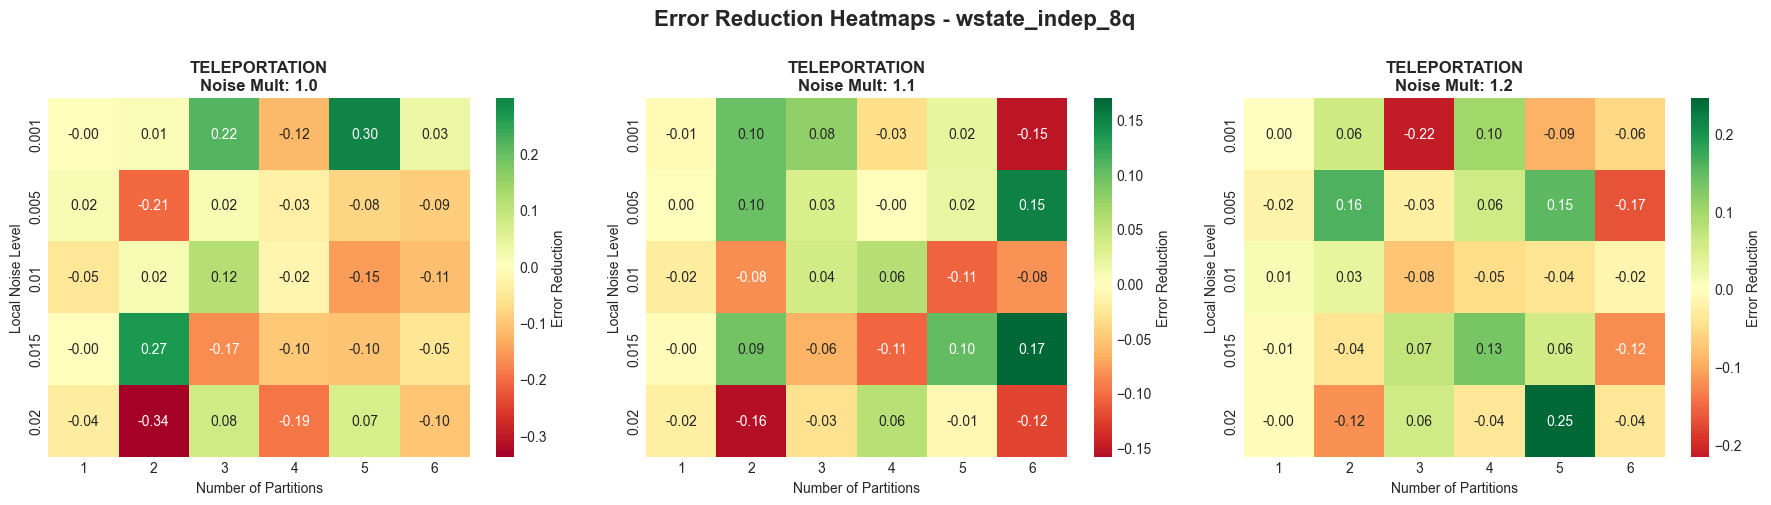

Saved: plots/heatmap_error_reduction_wstate_indep_8q.png


In [14]:
def plot_error_reduction_heatmaps(df, algorithm=None):
    """
    Create heatmaps showing how local noise and partitions affect error reduction
    for different communication strategies and noise multipliers.
    """
    if algorithm:
        df_plot = df[df['origin'] == algorithm].copy()
        title_suffix = f" - {algorithm}"
    else:
        df_plot = df.copy()
        title_suffix = " - All Algorithms"
    
    # Filter for cat and teleportation
    df_plot = df_plot[df_plot['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    df_plot['comm_type'] = df_plot['communication_primitive'].replace({'tp': 'teleportation', 'tg': 'teleportation'})
    
    comm_strategies = sorted(df_plot['comm_type'].unique())
    noise_mults = sorted(df_plot['communication_noise_multiplier'].unique())
    
    fig, axes = plt.subplots(len(comm_strategies), len(noise_mults), 
                            figsize=(6*len(noise_mults), 5*len(comm_strategies)))
    
    if len(comm_strategies) == 1 and len(noise_mults) == 1:
        axes = np.array([[axes]])
    elif len(comm_strategies) == 1:
        axes = axes.reshape(1, -1)
    elif len(noise_mults) == 1:
        axes = axes.reshape(-1, 1)
    
    for i, comm in enumerate(comm_strategies):
        for j, noise_mult in enumerate(noise_mults):
            ax = axes[i, j]
            
            # Filter data
            df_subset = df_plot[
                (df_plot['comm_type'] == comm) & 
                (df_plot['communication_noise_multiplier'] == noise_mult)
            ]
            
            if len(df_subset) > 0:
                # Pivot for heatmap
                pivot_data = df_subset.pivot_table(
                    values='error_reduction',
                    index='local_noise',
                    columns='num_partitions_tested',
                    aggfunc='mean'
                )
                
                sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', 
                           center=0, ax=ax, cbar_kws={'label': 'Error Reduction'},
                           annot_kws={'fontsize': 10})
                ax.set_title(f'{comm.upper()}\nNoise Mult: {noise_mult}', fontweight='bold')
                ax.set_xlabel('Number of Partitions')
                ax.set_ylabel('Local Noise Level')
            else:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{comm.upper()}\nNoise Mult: {noise_mult}')
    
    plt.suptitle(f'Error Reduction Heatmaps{title_suffix}', fontsize=16, fontweight='bold', y=1.002)
    plt.tight_layout()
    
    filename = f'plots/heatmap_error_reduction_{algorithm if algorithm else "combined"}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")

# Generate heatmaps
plot_error_reduction_heatmaps(df, algorithm=None)

# Also create for each algorithm
for algo in df['origin'].unique():
    plot_error_reduction_heatmaps(df, algorithm=algo)

### 2. Line Plots: Trends Across Partitions

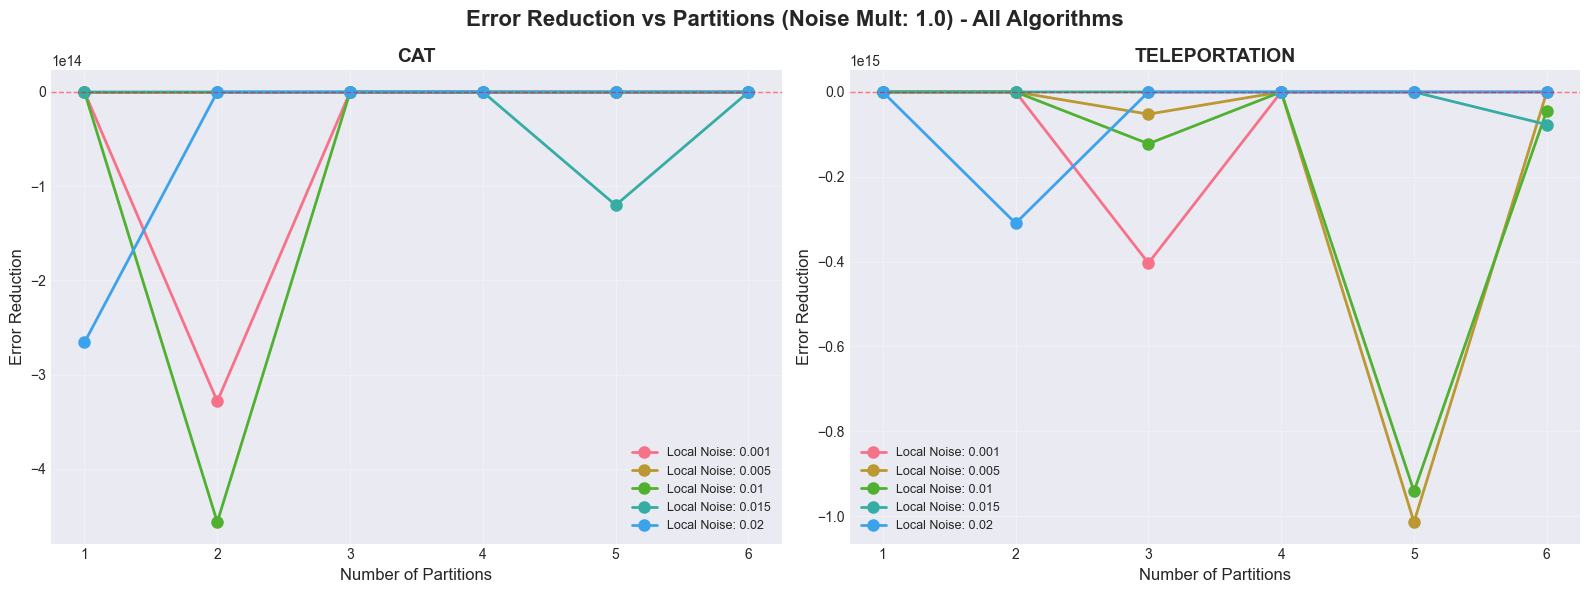

Saved: plots/trends_partitions_mult1.0_combined.png


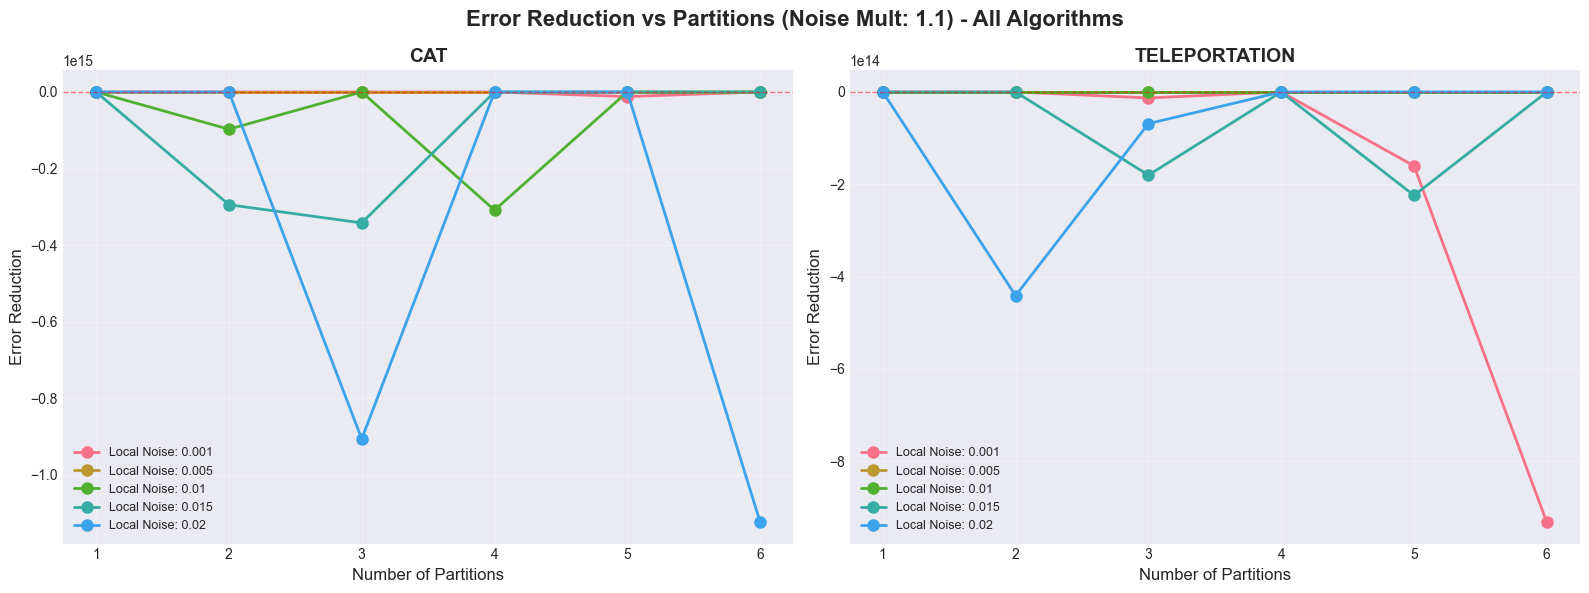

Saved: plots/trends_partitions_mult1.1_combined.png


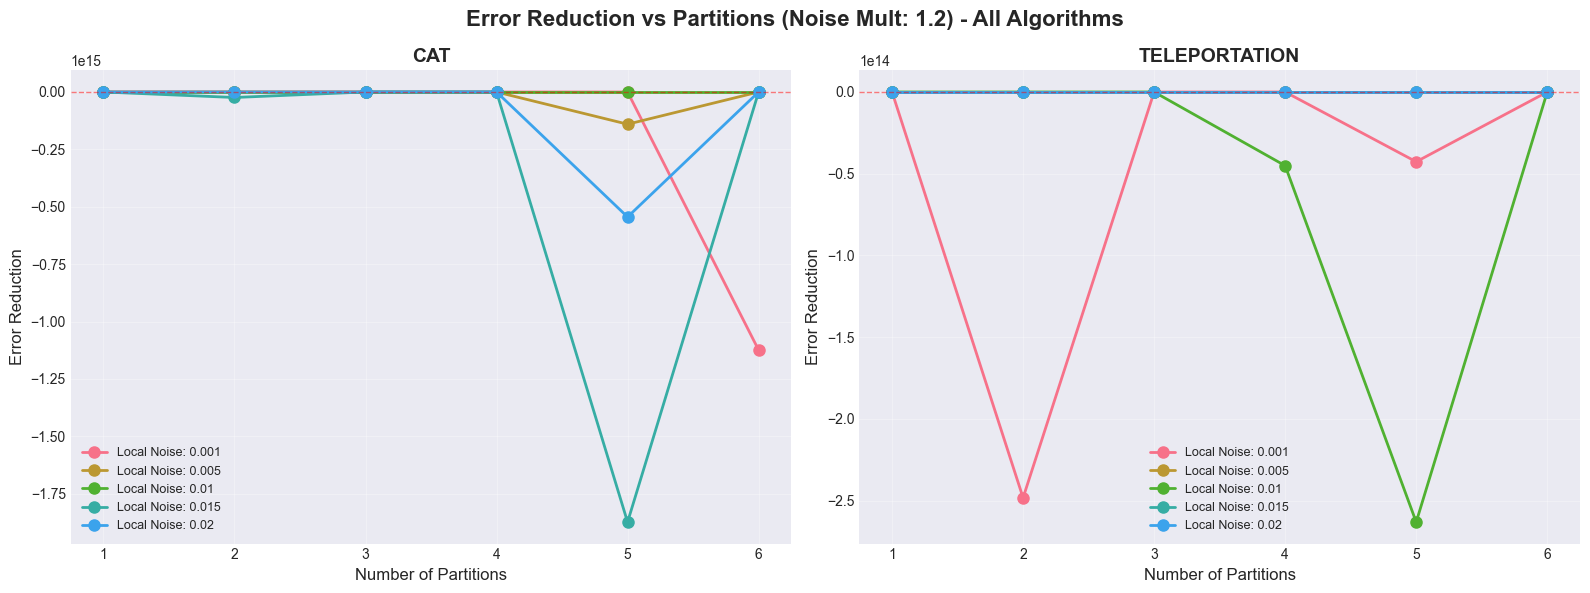

Saved: plots/trends_partitions_mult1.2_combined.png


In [15]:
def plot_partition_trends(df, algorithm=None):
    """
    Show how error reduction changes with number of partitions
    for different noise levels and communication strategies.
    """
    if algorithm:
        df_plot = df[df['origin'] == algorithm].copy()
        title_suffix = f" - {algorithm}"
    else:
        df_plot = df.copy()
        title_suffix = " - All Algorithms"
    
    df_plot = df_plot[df_plot['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    df_plot['comm_type'] = df_plot['communication_primitive'].replace({'tp': 'teleportation', 'tg': 'teleportation'})
    
    noise_mults = sorted(df_plot['communication_noise_multiplier'].unique())
    
    for noise_mult in noise_mults:
        df_mult = df_plot[df_plot['communication_noise_multiplier'] == noise_mult]
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot for each communication strategy
        for idx, comm in enumerate(sorted(df_mult['comm_type'].unique())):
            ax = axes[idx]
            df_comm = df_mult[df_mult['comm_type'] == comm]
            
            # Plot line for each noise level
            for noise in sorted(df_comm['local_noise'].unique()):
                df_noise = df_comm[df_comm['local_noise'] == noise]
                grouped = df_noise.groupby('num_partitions_tested')['error_reduction'].mean().reset_index()
                
                ax.plot(grouped['num_partitions_tested'], grouped['error_reduction'],
                       marker='o', linewidth=2, markersize=8, label=f'Local Noise: {noise}')
            
            ax.set_xlabel('Number of Partitions', fontsize=12)
            ax.set_ylabel('Error Reduction', fontsize=12)
            ax.set_title(f'{comm.upper()}', fontsize=14, fontweight='bold')
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3)
            ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
        
        plt.suptitle(f'Error Reduction vs Partitions (Noise Mult: {noise_mult}){title_suffix}', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        filename = f'plots/trends_partitions_mult{noise_mult}_{algorithm if algorithm else "combined"}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Saved: {filename}")

# Generate trend plots
plot_partition_trends(df, algorithm=None)

### 3. Scatter Plots: Direct Parameter Relationships

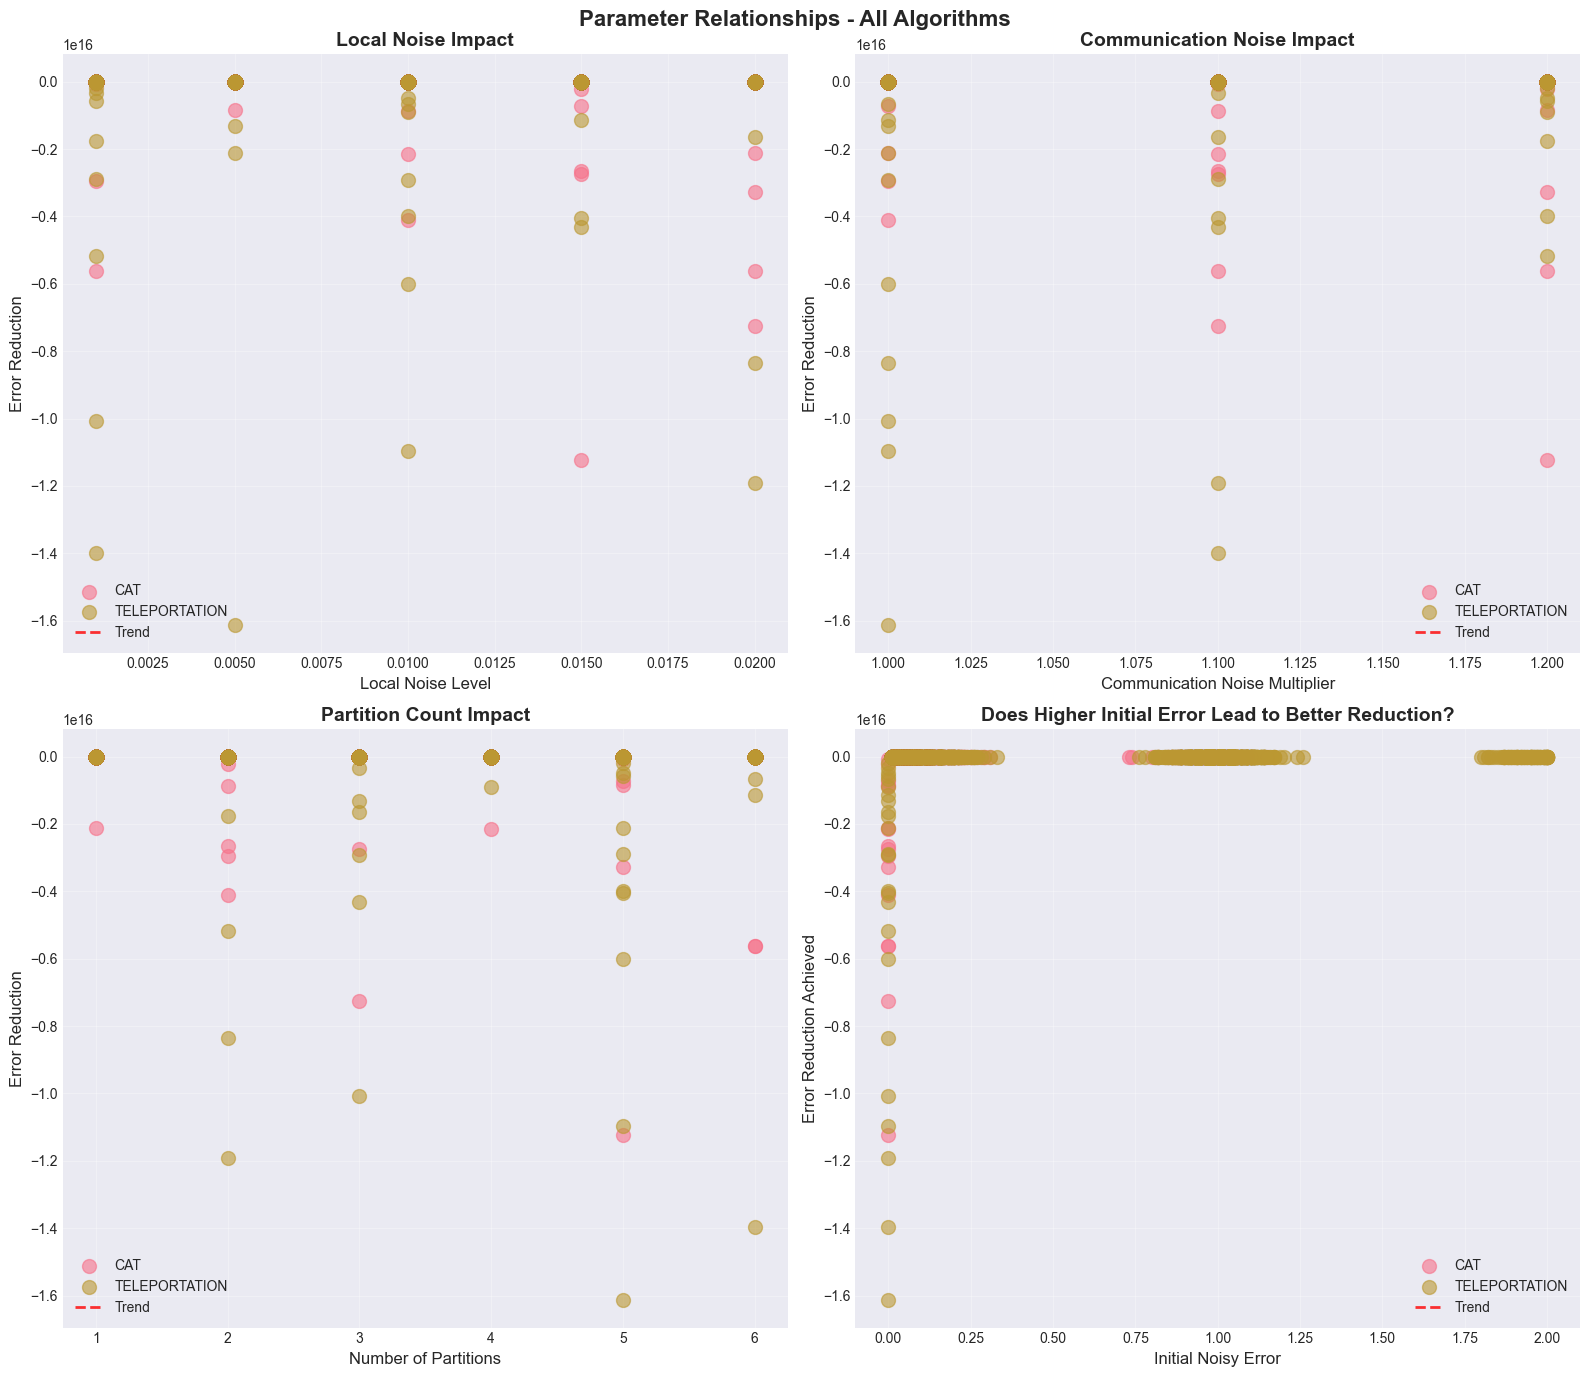

Saved: plots/scatter_relationships_combined.png


In [16]:
def plot_parameter_relationships(df, algorithm=None):
    """
    Scatter plots showing direct relationships between parameters and error reduction.
    """
    if algorithm:
        df_plot = df[df['origin'] == algorithm].copy()
        title_suffix = f" - {algorithm}"
    else:
        df_plot = df.copy()
        title_suffix = " - All Algorithms"
    
    df_plot = df_plot[df_plot['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    df_plot['comm_type'] = df_plot['communication_primitive'].replace({'tp': 'teleportation', 'tg': 'teleportation'})
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    
    # 1. Local Noise vs Error Reduction
    ax = axes[0, 0]
    for comm in sorted(df_plot['comm_type'].unique()):
        df_comm = df_plot[df_plot['comm_type'] == comm]
        ax.scatter(df_comm['local_noise'], df_comm['error_reduction'], 
                  alpha=0.6, s=100, label=comm.upper())
    
    # Add trend line
    z = np.polyfit(df_plot['local_noise'], df_plot['error_reduction'], 1)
    p = np.poly1d(z)
    ax.plot(df_plot['local_noise'].sort_values(), p(df_plot['local_noise'].sort_values()), 
           "r--", alpha=0.8, linewidth=2, label='Trend')
    
    ax.set_xlabel('Local Noise Level', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('Local Noise Impact', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Communication Noise Multiplier vs Error Reduction
    ax = axes[0, 1]
    for comm in sorted(df_plot['comm_type'].unique()):
        df_comm = df_plot[df_plot['comm_type'] == comm]
        ax.scatter(df_comm['communication_noise_multiplier'], df_comm['error_reduction'], 
                  alpha=0.6, s=100, label=comm.upper())
    
    z = np.polyfit(df_plot['communication_noise_multiplier'], df_plot['error_reduction'], 1)
    p = np.poly1d(z)
    ax.plot(df_plot['communication_noise_multiplier'].sort_values(), 
           p(df_plot['communication_noise_multiplier'].sort_values()), 
           "r--", alpha=0.8, linewidth=2, label='Trend')
    
    ax.set_xlabel('Communication Noise Multiplier', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('Communication Noise Impact', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Number of Partitions vs Error Reduction
    ax = axes[1, 0]
    for comm in sorted(df_plot['comm_type'].unique()):
        df_comm = df_plot[df_plot['comm_type'] == comm]
        ax.scatter(df_comm['num_partitions_tested'], df_comm['error_reduction'], 
                  alpha=0.6, s=100, label=comm.upper())
    
    z = np.polyfit(df_plot['num_partitions_tested'], df_plot['error_reduction'], 1)
    p = np.poly1d(z)
    ax.plot(df_plot['num_partitions_tested'].sort_values(), 
           p(df_plot['num_partitions_tested'].sort_values()), 
           "r--", alpha=0.8, linewidth=2, label='Trend')
    
    ax.set_xlabel('Number of Partitions', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('Partition Count Impact', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 4. Noisy Error vs Error Reduction (to see if worse starting points benefit more)
    ax = axes[1, 1]
    for comm in sorted(df_plot['comm_type'].unique()):
        df_comm = df_plot[df_plot['comm_type'] == comm]
        ax.scatter(df_comm['noisy_error'], df_comm['error_reduction'], 
                  alpha=0.6, s=100, label=comm.upper())
    
    z = np.polyfit(df_plot['noisy_error'], df_plot['error_reduction'], 1)
    p = np.poly1d(z)
    ax.plot(df_plot['noisy_error'].sort_values(), 
           p(df_plot['noisy_error'].sort_values()), 
           "r--", alpha=0.8, linewidth=2, label='Trend')
    
    ax.set_xlabel('Initial Noisy Error', fontsize=12)
    ax.set_ylabel('Error Reduction Achieved', fontsize=12)
    ax.set_title('Does Higher Initial Error Lead to Better Reduction?', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'Parameter Relationships{title_suffix}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    filename = f'plots/scatter_relationships_{algorithm if algorithm else "combined"}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")

# Generate scatter plots
plot_parameter_relationships(df, algorithm=None)

### 4. Box Plots: Distribution Comparison

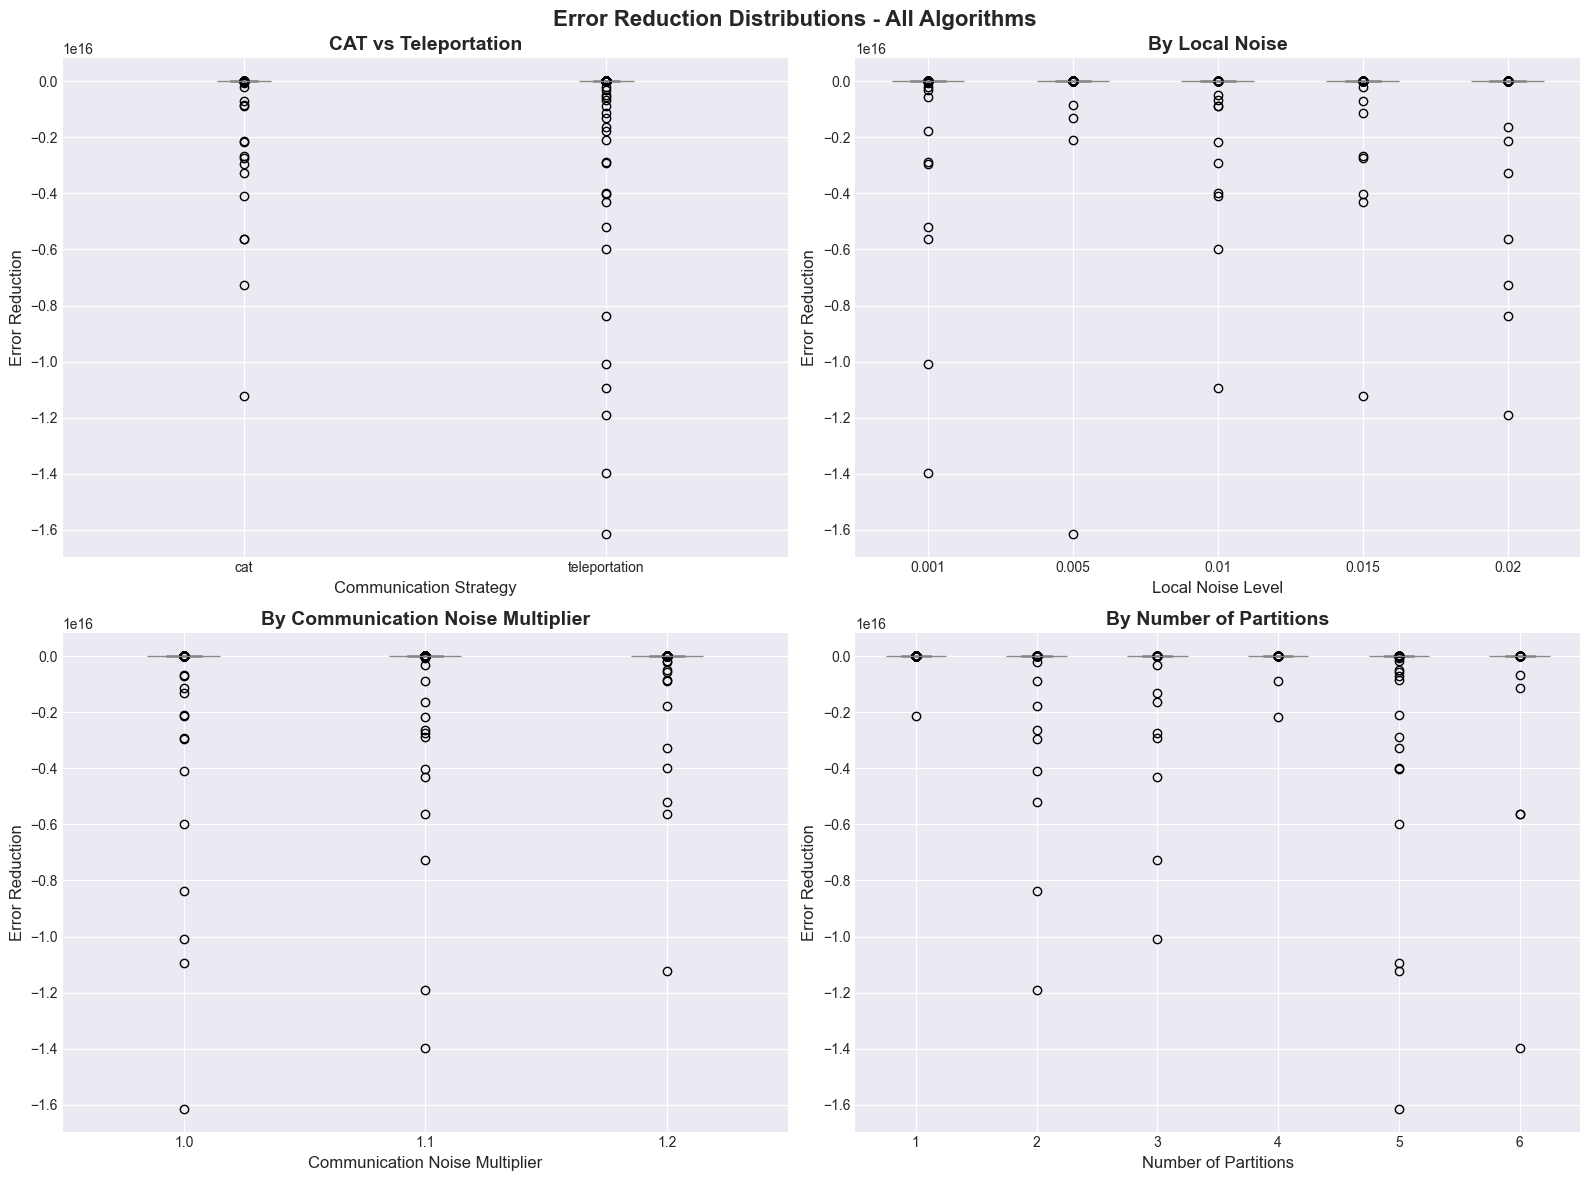

Saved: plots/boxplots_distributions_combined.png


In [17]:
def plot_distribution_comparisons(df, algorithm=None):
    """
    Box plots to compare error reduction distributions across different categories.
    """
    if algorithm:
        df_plot = df[df['origin'] == algorithm].copy()
        title_suffix = f" - {algorithm}"
    else:
        df_plot = df.copy()
        title_suffix = " - All Algorithms"
    
    df_plot = df_plot[df_plot['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    df_plot['comm_type'] = df_plot['communication_primitive'].replace({'tp': 'teleportation', 'tg': 'teleportation'})
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. By Communication Type
    ax = axes[0, 0]
    df_plot.boxplot(column='error_reduction', by='comm_type', ax=ax)
    ax.set_xlabel('Communication Strategy', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('CAT vs Teleportation', fontsize=14, fontweight='bold')
    plt.sca(ax)
    plt.xticks(rotation=0)
    
    # 2. By Local Noise Level
    ax = axes[0, 1]
    df_plot.boxplot(column='error_reduction', by='local_noise', ax=ax)
    ax.set_xlabel('Local Noise Level', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('By Local Noise', fontsize=14, fontweight='bold')
    
    # 3. By Communication Noise Multiplier
    ax = axes[1, 0]
    df_plot.boxplot(column='error_reduction', by='communication_noise_multiplier', ax=ax)
    ax.set_xlabel('Communication Noise Multiplier', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('By Communication Noise Multiplier', fontsize=14, fontweight='bold')
    
    # 4. By Number of Partitions
    ax = axes[1, 1]
    df_plot.boxplot(column='error_reduction', by='num_partitions_tested', ax=ax)
    ax.set_xlabel('Number of Partitions', fontsize=12)
    ax.set_ylabel('Error Reduction', fontsize=12)
    ax.set_title('By Number of Partitions', fontsize=14, fontweight='bold')
    
    plt.suptitle(f'Error Reduction Distributions{title_suffix}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    filename = f'plots/boxplots_distributions_{algorithm if algorithm else "combined"}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")

# Generate box plots
plot_distribution_comparisons(df, algorithm=None)

### 5. 3D Surface Plot: Combined Parameter Effects

/usr/local/lib/python3.10/site-packages/matplotlib/tri/_triangulation.py:181: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


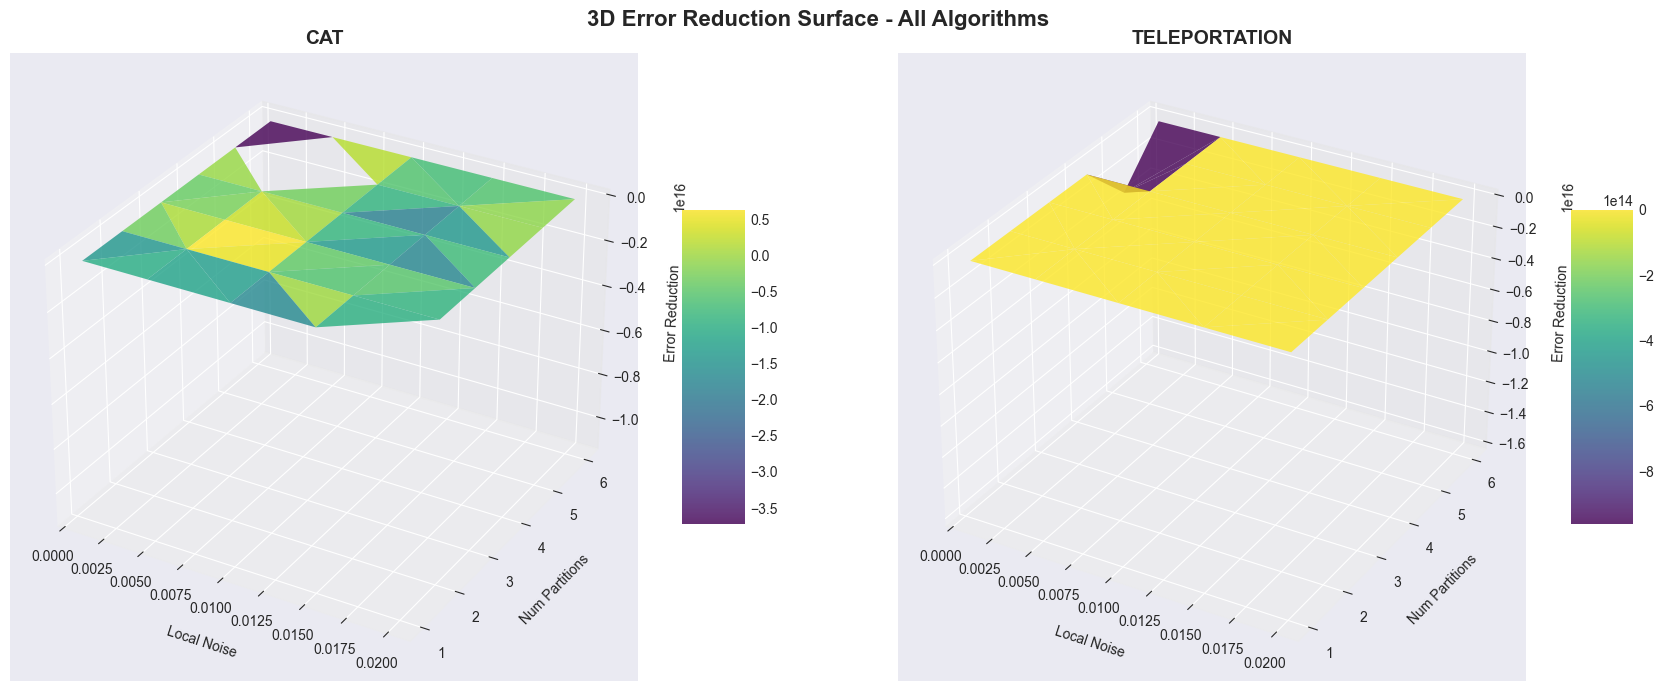

Saved: plots/3d_surface_combined.png


In [18]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

def plot_3d_surface(df, algorithm=None):
    """
    3D surface plot showing how two parameters jointly affect error reduction.
    """
    if algorithm:
        df_plot = df[df['origin'] == algorithm].copy()
        title_suffix = f" - {algorithm}"
    else:
        df_plot = df.copy()
        title_suffix = " - All Algorithms"
    
    df_plot = df_plot[df_plot['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    
    comm_strategies = ['cat', 'teleportation']
    fig = plt.figure(figsize=(18, 7))
    
    for idx, comm in enumerate(comm_strategies):
        if comm == 'teleportation':
            df_comm = df_plot[df_plot['communication_primitive'].isin(['tp', 'tg', 'teleportation'])]
        else:
            df_comm = df_plot[df_plot['communication_primitive'] == comm]
        
        if len(df_comm) > 0:
            ax = fig.add_subplot(1, 2, idx+1, projection='3d')
            
            x = df_comm['local_noise'].values
            y = df_comm['num_partitions_tested'].values
            z = df_comm['error_reduction'].values
            
            # Create surface
            surf = ax.plot_trisurf(x, y, z, cmap='viridis', alpha=0.8, edgecolor='none')
            
            ax.set_xlabel('Local Noise', fontsize=10, labelpad=10)
            ax.set_ylabel('Num Partitions', fontsize=10, labelpad=10)
            ax.set_zlabel('Error Reduction', fontsize=10, labelpad=10)
            ax.set_title(f'{comm.upper()}', fontsize=14, fontweight='bold')
            
            fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.suptitle(f'3D Error Reduction Surface{title_suffix}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    filename = f'plots/3d_surface_{algorithm if algorithm else "combined"}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")

# Generate 3D surface plots
plot_3d_surface(df, algorithm=None)

### 6. Statistical Summary: Quick Insights

In [19]:
def print_quick_insights(df):
    """
    Print quick statistical insights about what affects error reduction most.
    """
    df_analysis = df[df['communication_primitive'].isin(['cat', 'tp', 'tg', 'teleportation'])].copy()
    df_analysis['comm_type'] = df_analysis['communication_primitive'].replace({'tp': 'teleportation', 'tg': 'teleportation'})
    
    print("\n" + "="*80)
    print("QUICK INSIGHTS: WHAT MATTERS MOST?")
    print("="*80 + "\n")
    
    # 1. Effect sizes (comparing best vs worst)
    print("1. EFFECT SIZES (Higher = More Important)\n")
    
    # Communication strategy effect
    cat_avg = df_analysis[df_analysis['comm_type'] == 'cat']['error_reduction'].mean()
    tp_avg = df_analysis[df_analysis['comm_type'] == 'teleportation']['error_reduction'].mean()
    comm_effect = abs(cat_avg - tp_avg)
    print(f"   Communication Strategy (CAT vs TP): {comm_effect:.4f}")
    print(f"     • CAT average: {cat_avg:.4f}")
    print(f"     • Teleportation average: {tp_avg:.4f}")
    
    # Noise level effect
    noise_effects = []
    for noise in df_analysis['local_noise'].unique():
        avg = df_analysis[df_analysis['local_noise'] == noise]['error_reduction'].mean()
        noise_effects.append(avg)
    noise_effect = max(noise_effects) - min(noise_effects)
    print(f"\n   Local Noise Level: {noise_effect:.4f}")
    print(f"     • Best noise level: {df_analysis.groupby('local_noise')['error_reduction'].mean().idxmax()}")
    print(f"     • Worst noise level: {df_analysis.groupby('local_noise')['error_reduction'].mean().idxmin()}")
    
    # Partition effect
    partition_effects = []
    for part in df_analysis['num_partitions_tested'].unique():
        avg = df_analysis[df_analysis['num_partitions_tested'] == part]['error_reduction'].mean()
        partition_effects.append(avg)
    partition_effect = max(partition_effects) - min(partition_effects)
    print(f"\n   Number of Partitions: {partition_effect:.4f}")
    print(f"     • Best partition count: {df_analysis.groupby('num_partitions_tested')['error_reduction'].mean().idxmax()}")
    print(f"     • Worst partition count: {df_analysis.groupby('num_partitions_tested')['error_reduction'].mean().idxmin()}")
    
    # 2. Ranking of importance
    print("\n\n2. PARAMETER IMPORTANCE RANKING\n")
    importance = [
        ('Communication Strategy', comm_effect),
        ('Local Noise Level', noise_effect),
        ('Number of Partitions', partition_effect)
    ]
    importance.sort(key=lambda x: x[1], reverse=True)
    
    for rank, (param, effect) in enumerate(importance, 1):
        print(f"   {rank}. {param}: Effect size = {effect:.4f}")
    
    # 3. Best configuration
    print("\n\n3. OPTIMAL CONFIGURATION\n")
    best_idx = df_analysis['error_reduction'].idxmax()
    best = df_analysis.loc[best_idx]
    print(f"   Communication: {best['comm_type'].upper()}")
    print(f"   Local Noise: {best['local_noise']}")
    print(f"   Noise Multiplier: {best['communication_noise_multiplier']}")
    print(f"   Partitions: {best['num_partitions_tested']}")
    print(f"   Error Reduction Achieved: {best['error_reduction']:.4f} ({best['error_reduction']*100:.2f}%)")
    
    print("\n" + "="*80 + "\n")

# Print insights
print_quick_insights(df)


QUICK INSIGHTS: WHAT MATTERS MOST?

1. EFFECT SIZES (Higher = More Important)

   Communication Strategy (CAT vs TP): 22988876393842.0000
     • CAT average: -80227681017543.2344
     • Teleportation average: -57238804623701.2344

   Local Noise Level: 45491578060696.9062
     • Best noise level: 0.005
     • Worst noise level: 0.001

   Number of Partitions: 173164634528921.6875
     • Best partition count: 1
     • Worst partition count: 5


2. PARAMETER IMPORTANCE RANKING

   1. Number of Partitions: Effect size = 173164634528921.6875
   2. Local Noise Level: Effect size = 45491578060696.9062
   3. Communication Strategy: Effect size = 22988876393842.0000


3. OPTIMAL CONFIGURATION

   Communication: TELEPORTATION
   Local Noise: 0.001
   Noise Multiplier: 1.0
   Partitions: 4
   Error Reduction Achieved: 1.0000 (100.00%)


